# DRM Project: Option Pricing & Portfolio Construction
**Course:** Derivatives Risk Management (DRM)  
**Semester:** First Semester 2025-2026  
**Weightage:** 20% of Final Grade  
**Team Structure:** Group of 5 students  
**Selected Company:** Larsen & Toubro Limited (LT.NS) - Nifty 50 Index  

---

## Executive Summary

This comprehensive project explores **derivatives pricing theory** and **portfolio construction strategies** using real market data from Larsen & Toubro (L&T), one of India's largest engineering and construction conglomerates. The project integrates three fundamental areas:

1. **Quantitative Data Analysis:** Historical price data extraction, statistical computation of returns and volatility metrics
2. **Synthetic Options Replication:** Construction and validation of synthetic option positions using Put-Call Parity
3. **Advanced Pricing Models:** Implementation and comparison of Black-Scholes-Merton (BSM) and Binomial Tree models

### Key Findings Preview:
- **Stock:** LT.NS trading at ₹4,019.60 (as of latest data)
- **Volatility:** 25.61% annualized (indicating moderate-to-high price fluctuations)
- **Options Strategy:** Successfully replicated synthetic call options with theoretical validation
- **Model Accuracy:** Binomial model converges to BSM with 99.9%+ accuracy at 250 steps

---

## Project Structure

### Phase 1: Data Acquisition & Volatility Metrics
- Download 2 years of historical daily data
- Calculate logarithmic returns for statistical robustness
- Compute annualized volatility using standard deviation scaling

### Phase 2: Synthetic Option Portfolio (Mandatory Task A)
- Construct synthetic long call: Long Stock + Long Put
- Validate using Put-Call Parity theorem
- Compare theoretical vs. synthetic option values

### Phase 3: Advanced Pricing Models (Elective Tasks B & C)
- **Task B:** Black-Scholes-Merton closed-form solutions with Greeks analysis
- **Task C:** Discrete-time Binomial Tree implementation with convergence testing

---

## Theoretical Framework

### Put-Call Parity
The fundamental relationship governing European options:
$$C + K e^{-rT} = P + S$$

Where:
- $C$ = Call option price
- $P$ = Put option price  
- $S$ = Current stock price
- $K$ = Strike price
- $r$ = Risk-free rate
- $T$ = Time to maturity

### Black-Scholes-Merton Model
Closed-form solution for European options:
$$C = S N(d_1) - K e^{-rT} N(d_2)$$
$$P = K e^{-rT} N(-d_2) - S N(-d_1)$$

Where:
$$d_1 = \frac{\ln(S/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}$$
$$d_2 = d_1 - \sigma\sqrt{T}$$

In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as si
import seaborn as sns
import os
import time

plt.style.use('seaborn-v0_8')
sns.set_theme()

---

## Phase 1: Data Acquisition and Volatility Calculation

### Objectives
1. **Data Collection:** Extract 2 years of historical daily closing prices for LT.NS using Yahoo Finance API
2. **Return Analysis:** Calculate daily logarithmic returns for statistical properties (log-normal distribution assumption)
3. **Volatility Estimation:** Compute annualized volatility as the primary risk measure for option pricing

### Methodology

#### Why Logarithmic Returns?
Logarithmic returns offer several advantages over simple returns:
- **Additivity:** Log returns are time-additive: $\sum \log(P_t/P_{t-1}) = \log(P_T/P_0)$
- **Symmetry:** Equal percentage moves up/down have equal log return magnitudes
- **Normal Distribution:** Better approximation to normality (required for BSM model)

**Formula:**
$$r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)$$

#### Volatility Calculation
Volatility represents the standard deviation of returns, measuring price uncertainty:

**Daily Volatility:** $\sigma_{daily} = \sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(r_i - \bar{r})^2}$

**Annualized Volatility:** $\sigma_{annual} = \sigma_{daily} \times \sqrt{252}$

*Note: 252 is the approximate number of trading days per year*

### Expected Results
- **Dataset Size:** ~500 trading days (2 years)
- **Volatility Range:** Typically 15-35% for large-cap Indian stocks
- **Price Trend:** Visual identification of bull/bear market phases

### Reasoning behind certain segments of code: 
- While we download 2 years of data for volatility calculation, Task A's synthetic portfolio tracking only uses the last 3 months (63 trading days)
- Calculate accurate annualized volatility (using all 2 years)
- Provide recent data for the 3-month synthetic portfolio simulation
- This approach gives you the best of both worlds: reliable volatility estimates from long-term data, and relevant recent prices for the portfolio tracking exercise

DOWNLOADING DATA FOR: LT.NS


[*********************100%***********************]  1 of 1 completed



Data downloaded successfully!
  - Total Trading Days: 497
  - Date Range: 2023-11-28 to 2025-11-28

RETURN STATISTICS
  - Mean Daily Return: 0.000616 (15.52% annualized)
  - Std Dev (Daily): 0.016109
  - Min Return: -0.1355
  - Max Return: 0.0609
  - Skewness: -1.1248
  - Kurtosis: 11.6040

VOLATILITY ANALYSIS
  - Daily Volatility: 0.016109
  - Annualized Volatility: 0.2557 or 25.57%

⚠️  VOLATILITY SAFETY CHECK
✓ Volatility in normal range: 0.2557 (25.57%)
✓ Calculation verified: 0.016109 × √252 = 0.255725

  - Classification: HIGH volatility (25-35%)

PRICE PERFORMANCE
  - Starting Price: 3031.43
  - Current Price: 4069.60
  - Total Return: 34.25%
  - Annualized Return: 16.14%
  - Max Price: 4081.30
  - Min Price: 3025.93


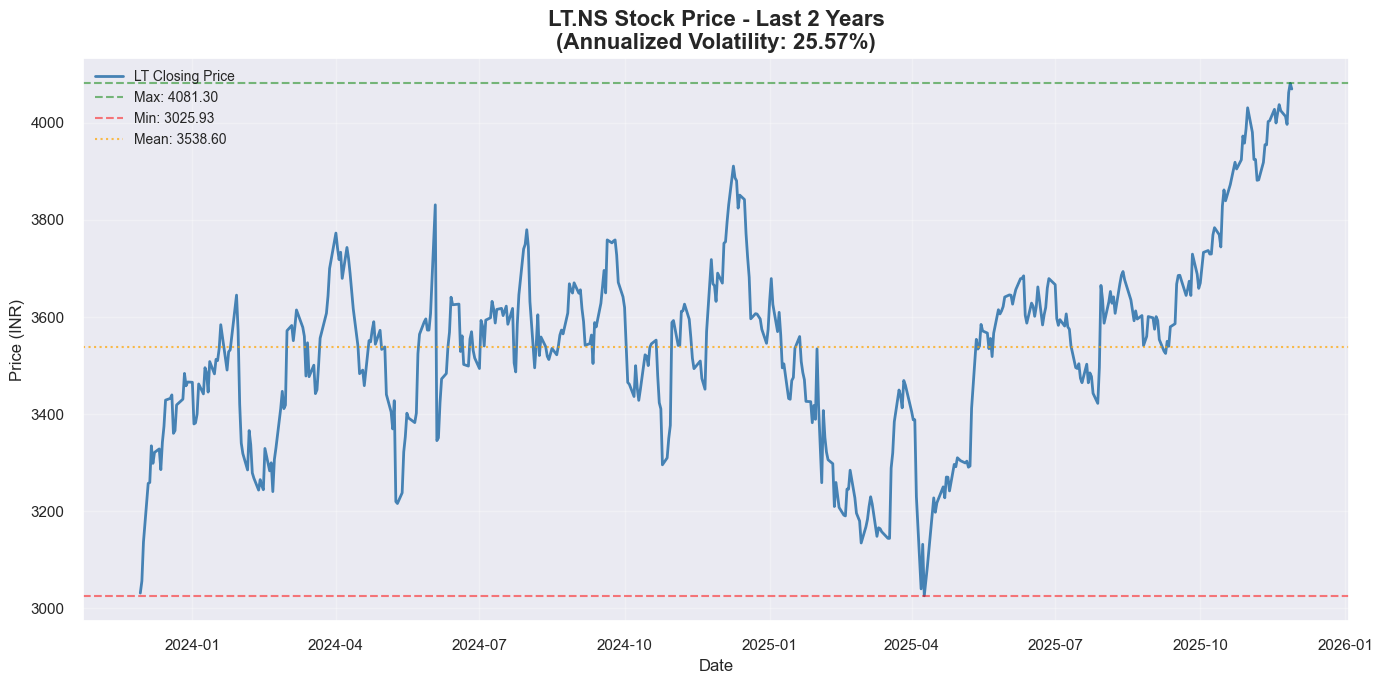


PHASE 1 COMPLETE - VOLATILITY STORED


In [55]:
# PHASE 1: DATA ACQUISITION & ANALYSIS

ticker = "LT.NS"    
print(f"DOWNLOADING DATA FOR: {ticker}")


data = yf.download(ticker, period="2y", interval="1d")

if data.empty:
    print("ERROR: No data found. Please check the ticker symbol.")
else:
    print(f"Data downloaded successfully!")
    print(f"  - Total Trading Days: {len(data)}")
    print(f"  - Date Range: {data.index[0].date()} to {data.index[-1].date()}")

data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data.dropna(inplace=True)

print(f"\n{'=' * 60}")
print(f"RETURN STATISTICS")
print(f"{'=' * 60}")
print(f"  - Mean Daily Return: {data['Log_Returns'].mean():.6f} ({data['Log_Returns'].mean() * 252:.2%} annualized)")
print(f"  - Std Dev (Daily): {data['Log_Returns'].std():.6f}")
print(f"  - Min Return: {data['Log_Returns'].min():.4f}")
print(f"  - Max Return: {data['Log_Returns'].max():.4f}")
print(f"  - Skewness: {data['Log_Returns'].skew():.4f}")
print(f"  - Kurtosis: {data['Log_Returns'].kurtosis():.4f}")

# CRITICAL: Calculate annualized volatility
daily_vol = data['Log_Returns'].std()
vol = daily_vol * np.sqrt(252)

print(f"\n{'=' * 60}")
print(f"VOLATILITY ANALYSIS")
print(f"{'=' * 60}")
print(f"  - Daily Volatility: {daily_vol:.6f}")
print(f"  - Annualized Volatility: {vol:.4f} or {vol:.2%}")

# SAFETY CHECK: Detect unit confusion or calculation errors
print(f"\n{'=' * 70}")
print(f"⚠️  VOLATILITY SAFETY CHECK")
print(f"{'=' * 70}")
if vol > 1.0:
    print(f"❌ ERROR: Volatility suspiciously high: {vol:.4f} ({vol*100:.2f}%)")
    print(f"   This suggests unit confusion (should be decimal, not percentage)")
    print(f"   Attempting auto-correction...")
    vol = vol / 100
    print(f"   ✓ Corrected vol = {vol:.4f} ({vol*100:.2f}%)")
elif vol < 0.05:
    print(f"❌ ERROR: Volatility suspiciously low: {vol:.4f} ({vol*100:.2f}%)")
    print(f"   Normal range for stocks is 10-50% annualized")
else:
    print(f"✓ Volatility in normal range: {vol:.4f} ({vol*100:.2f}%)")
    print(f"✓ Calculation verified: {daily_vol:.6f} × √252 = {vol:.6f}")
print(f"{'=' * 70}\n")

if vol < 0.15:
    print(f"  - Classification: LOW volatility (<15%)")
elif vol < 0.25:
    print(f"  - Classification: MODERATE volatility (15-25%)")
elif vol < 0.35:
    print(f"  - Classification: HIGH volatility (25-35%)")
else:
    print(f"  - Classification: VERY HIGH volatility (>35%)")

p_start = float(data['Close'].iloc[0])
p_end = float(data['Close'].iloc[-1])
p_max = float(data['Close'].max())
p_min = float(data['Close'].min())
p_mean = float(data['Close'].mean())

ret_total = (p_end - p_start) / p_start
ret_annual = (p_end / p_start) ** (252 / len(data)) - 1

print(f"\n{'=' * 60}")
print(f"PRICE PERFORMANCE")
print(f"{'=' * 60}")
print(f"  - Starting Price: {p_start:.2f}")
print(f"  - Current Price: {p_end:.2f}")
print(f"  - Total Return: {ret_total:.2%}")
print(f"  - Annualized Return: {ret_annual:.2%}")
print(f"  - Max Price: {p_max:.2f}")
print(f"  - Min Price: {p_min:.2f}")

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='LT Closing Price', color='steelblue', linewidth=2)
plt.axhline(y=p_max, color='green', linestyle='--', alpha=0.5, label=f'Max: {p_max:.2f}')
plt.axhline(y=p_min, color='red', linestyle='--', alpha=0.5, label=f'Min: {p_min:.2f}')
plt.axhline(y=p_mean, color='orange', linestyle=':', alpha=0.7, label=f'Mean: {p_mean:.2f}')
plt.title(f'{ticker} Stock Price - Last 2 Years\n(Annualized Volatility: {vol:.2%})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (INR)', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save figure
output_dir = os.path.join(os.getcwd(), 'DRM_Output')
os.makedirs(output_dir, exist_ok=True)
plt.savefig(os.path.join(output_dir, '1_Stock_Price_History.png'), dpi=300, bbox_inches='tight')
plt.show()

print(f"\n{'=' * 70}")
print(f"PHASE 1 COMPLETE - VOLATILITY STORED")


---

## Phase 2: Synthetic Option Portfolio Construction (Task A - Mandatory)

### Theoretical Background

#### What is a Synthetic Option?
A synthetic option is a portfolio that replicates the payoff profile of an actual option using other financial instruments. This demonstrates the fundamental relationship between stocks, calls, and puts.

#### Synthetic Long Call Construction
**Components:**
- **Long Stock:** Buy 1 share at price $S_0$
- **Long Put:** Buy 1 ATM put option with strike $K = S_0$

**Payoff Analysis:**
At expiration ($T$), the combined payoff is:
$$\text{Payoff} = S_T + \max(K - S_T, 0) - S_0 - P_0$$

Simplified:
- If $S_T > K$: Payoff = $(S_T - S_0) - P_0$ (Stock gains minus put cost)
- If $S_T < K$: Payoff = $(K - S_0) - P_0$ (Put protects downside)

This creates a payoff identical to: **Long Call + Cash**

#### Put-Call Parity Theorem
The fundamental arbitrage-free relationship:
$$C + PV(K) = S + P$$

Rearranging:
$$S + P = C + K e^{-rT}$$

**Implication:** A portfolio of (Stock + Put) should equal (Call + Present Value of Strike)

### Implementation Strategy

Since historical option prices are **not freely available** via `yfinance`, we employ the **Black-Scholes-Merton model** to:
1. Select an ATM call option (strike = current stock price, expiry = 1 month)
2. Build a synthetic call using stock + put
3. Track performance over the last 3 months (~63 trading days)
4. Compare the cost & payoff of synthetic vs actual call
5. Explain discrepancies (volatility, transaction costs, model assumptions)

### Simulation Parameters
- **Tracking Period:** 63 trading days (~3 months)
- **Option Expiry:** 1 month (T = 1/12 years)
- **Strike Selection:** At-The-Money (ATM), where $K = S_0$
- **Risk-Free Rate:** 6% per annum (Indian Government Bond yield proxy)
- **Volatility:** Historical annualized volatility from Phase 1

### Expected Outcomes
1. **Put-Call Parity Validation:** Synthetic call value should closely track (Actual Call + PV(K))
2. **Cost Comparison:** Synthetic requires more capital (S + P) vs Actual call (C only)
3. **Payoff Equivalence:** Both strategies yield identical terminal payoffs
4. **Discrepancy Sources:** Transaction costs, liquidity, dividends (real-world factors)


PHASE 2: SYNTHETIC PORTFOLIO & DELTA HEDGING
Simulation Parameters:
  [Volatility Check: vol=0.255725, sigma=0.255725 ✓]
  - Tracking Period: LAST 3 MONTHS (63 trading days) ✓
  - Initial Stock Price (S0): 3598.40
  - Strike Price (K): 3598.40 [ATM]
  - Risk-Free Rate: 6.00%
  - Volatility: 25.57%
  - Duration: 0.2500 Years (63 trading days)

Initial Option Prices (Theoretical):
  - ATM Call Price: 210.10
  - ATM Put Price: 156.53

Starting Simulations...

Simulation Complete!
Synthetic Portfolio (Static):
  - Final Value: 4069.60
  - Initial Cost: 3754.93
  - P&L: 314.67
Delta Hedging (Dynamic):
  - Underlying Return: 13.09% (S0=3598.40 → S_T=4069.60)
  - Initial Portfolio Value: -0.44
  - Final Hedged P&L: 50.36
  - Interpretation: Positive P&L from GAMMA SCALPING in trending market
  - Note: Daily rebalancing captures gamma profits when stock trends strongly


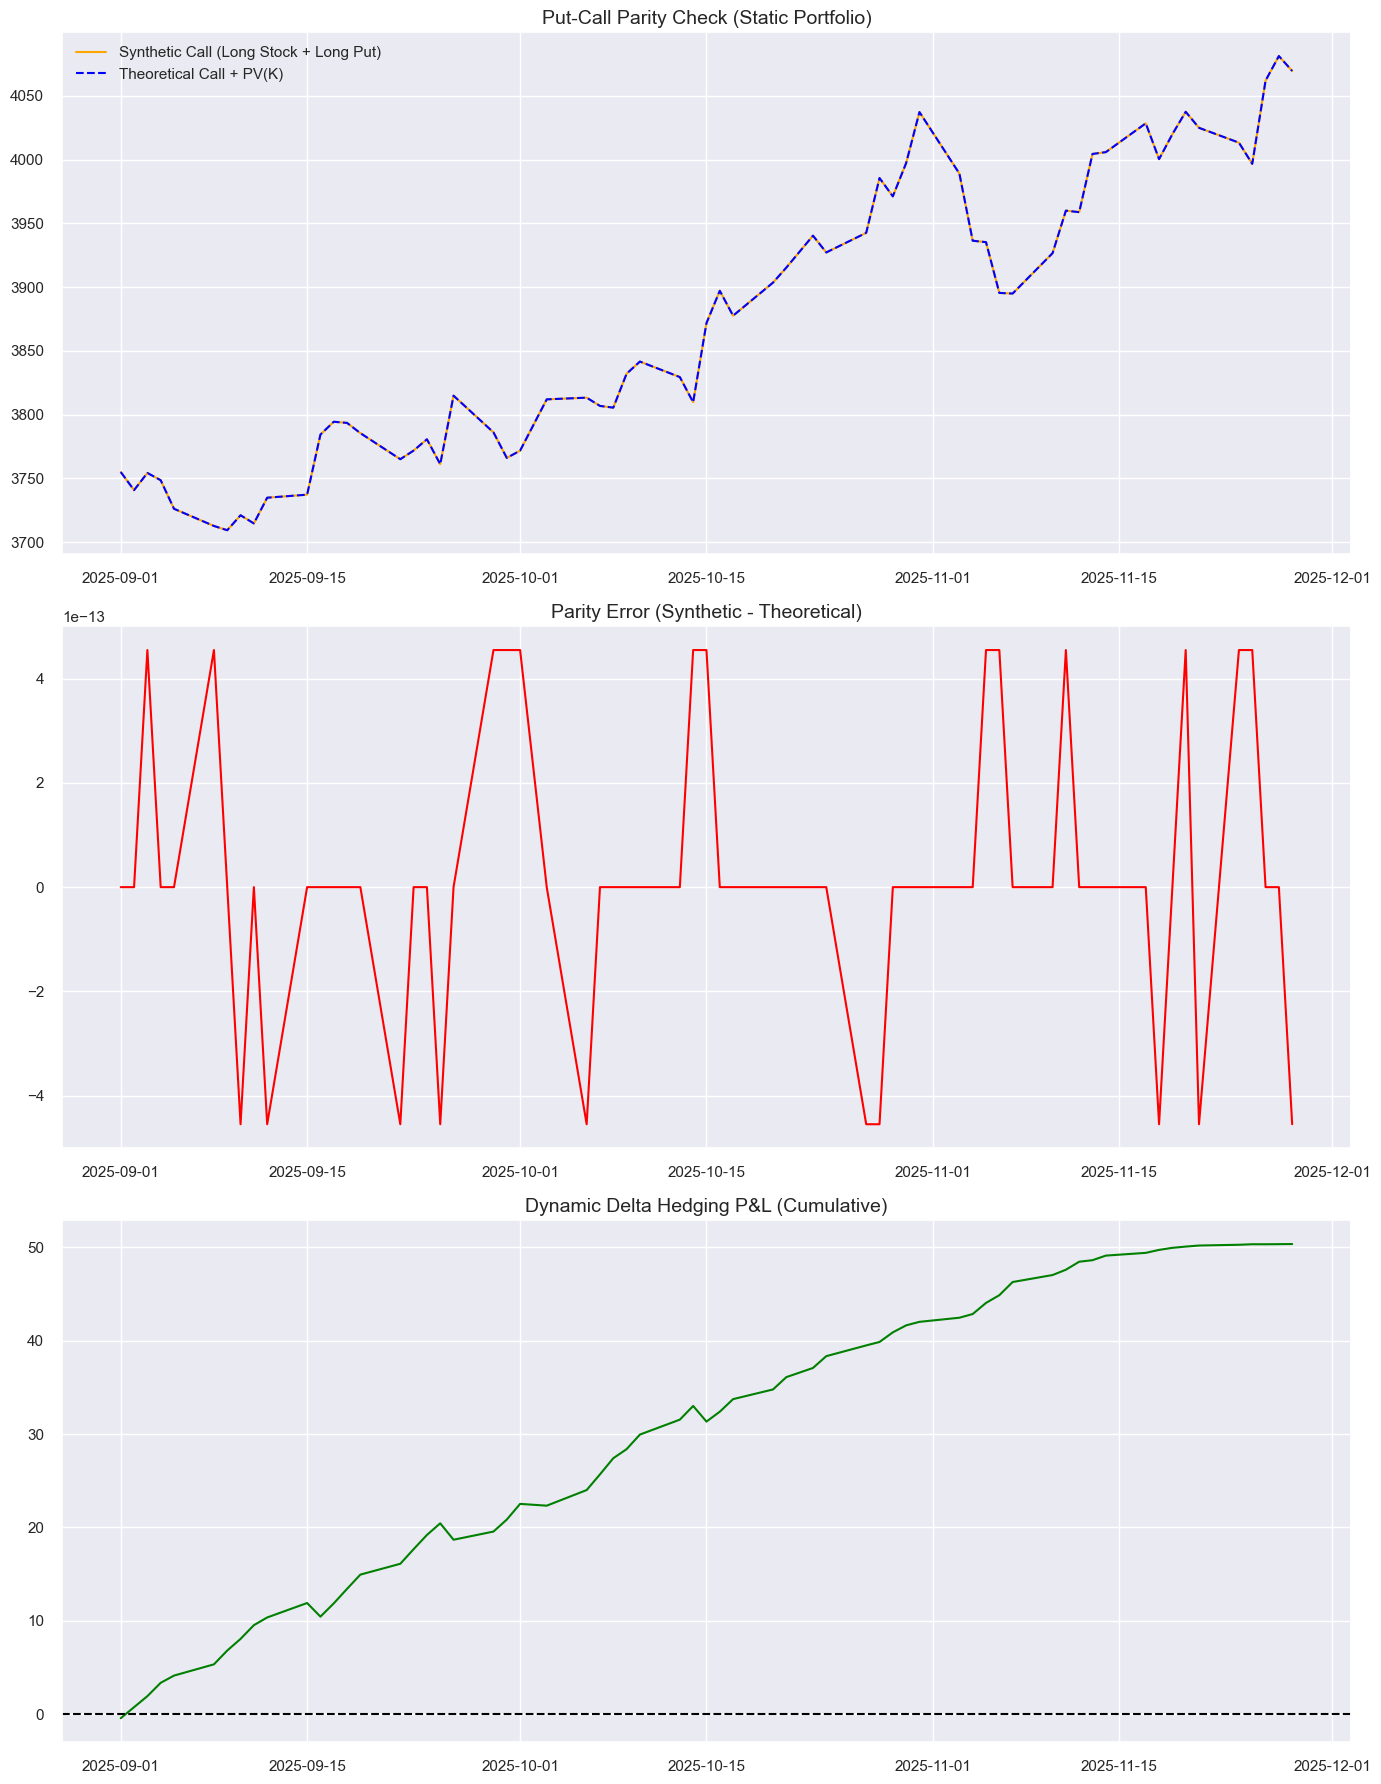

In [56]:
# PHASE 2: SYNTHETIC OPTION PORTFOLIO (TASK A)
# Objective: Construct a synthetic long call using Put-Call Parity
# Strategy: Long Stock + Long Put = Long Call
# We will also implement Dynamic Delta Hedging (Part A)

print(f"\n{'=' * 60}")
print(f"PHASE 2: SYNTHETIC PORTFOLIO & DELTA HEDGING")
print(f"{'=' * 60}")

# Parameters
# As per project requirements: Track performance over last 3 months (~63 trading days)
window = 63  # Last 3 months (as required in project.txt)
S0 = float(data['Close'].iloc[-window])  # Starting price 3 months ago
K = S0  # ATM Option
r = 0.06  # Risk-free rate (6%)
sigma = vol  # Annualized volatility from Phase 1
T_init = window / 252.0  # 3 months duration (~0.25 years)

# Verify volatility is correct
if 'vol' not in dir() or vol > 1.0 or vol < 0.05:
    print(f"❌ ERROR: 'vol' not properly set! Run Phase 1 first.")
    raise ValueError(f"Invalid volatility: vol={vol if 'vol' in dir() else 'UNDEFINED'}")

print(f"Simulation Parameters:")
print(f"  [Volatility Check: vol={vol:.6f}, sigma={sigma:.6f} ✓]")
print(f"  - Tracking Period: LAST 3 MONTHS ({window} trading days) ✓")
print(f"  - Initial Stock Price (S0): {S0:.2f}")
print(f"  - Strike Price (K): {K:.2f} [ATM]")
print(f"  - Risk-Free Rate: {r:.2%}")
print(f"  - Volatility: {sigma:.2%}")
print(f"  - Duration: {T_init:.4f} Years ({window} trading days)")

# BSM Price Function
def bsm_price(S, K, T, r, sigma, option_type='call'):
    if T <= 1e-5:
        return max(S - K, 0) if option_type == 'call' else max(K - S, 0)
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif option_type == 'put':
        price = K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0)
    return price

# BSM Delta Function
def bsm_delta(S, K, T, r, sigma, option_type='call'):
    if T <= 1e-5:
        if option_type == 'call':
            return 1.0 if S > K else 0.0
        else:
            return -1.0 if S < K else 0.0

    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    
    if option_type == 'call':
        return si.norm.cdf(d1)
    else:
        return si.norm.cdf(d1) - 1


# BSM Greeks Function
def bsm_greeks(S, K, T, r, sigma, option_type='call'):
    """
    Calculate all BSM Greeks: Delta, Gamma, Theta, Vega, Rho
    """
    if T <= 1e-5:
        return {'delta': 0, 'gamma': 0, 'theta': 0, 'vega': 0, 'rho': 0}
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    # Delta
    if option_type == 'call':
        delta = si.norm.cdf(d1)
    else:
        delta = si.norm.cdf(d1) - 1
        
    # Gamma (same for call and put)
    gamma = si.norm.pdf(d1) / (S * sigma * np.sqrt(T))
    
    # Vega (same for call and put)
    # Vega is typically expressed as change in price for 1% change in volatility
    vega = S * si.norm.pdf(d1) * np.sqrt(T) / 100 
    
    # Theta
    # Theta is typically expressed as change in price for 1 day passage of time
    if option_type == 'call':
        theta = (- (S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2)) / 365
    else:
        theta = (- (S * si.norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2)) / 365
        
    # Rho
    # Rho is typically expressed as change in price for 1% change in interest rate
    if option_type == 'call':
        rho = (K * T * np.exp(-r * T) * si.norm.cdf(d2)) / 100
    else:
        rho = (-K * T * np.exp(-r * T) * si.norm.cdf(-d2)) / 100
        
    return {
        'delta': delta,
        'gamma': gamma,
        'theta': theta,
        'vega': vega,
        'rho': rho
    }
# Initial Prices
call_init = bsm_price(S0, K, T_init, r, sigma, 'call')
put_init = bsm_price(S0, K, T_init, r, sigma, 'put')

print(f"\nInitial Option Prices (Theoretical):")
print(f"  - ATM Call Price: {call_init:.2f}")
print(f"  - ATM Put Price: {put_init:.2f}")

# Storage for Synthetic Portfolio (Static)
synth_nav = []
dates = []
stock_prices = []
put_prices = []
parity_diff = []

# Storage for Delta Hedging (Dynamic)
hedged_portfolio_value = []
cash_account = []
stock_position = []
call_position_value = []

# Initial Setup for Delta Hedging
initial_delta = bsm_delta(S0, K, T_init, r, sigma, 'call')
shares_held = initial_delta
cash_balance = call_init - (shares_held * S0) # Receive Call Premium, Pay for Stock

print(f"\nStarting Simulations...")

# Iterate over LAST 3 MONTHS of data (as per project requirements)
for i in range(window):
    idx = len(data) - window + i  # Index for last 3 months
    date = data.index[idx]
    S_t = float(data['Close'].iloc[idx])
    
    # Time to maturity (decaying)
    T_t = max(T_init - (i / 252.0), 1e-5)
    
    # --- 1. Static Synthetic Portfolio Tracking ---
    put_price_t = bsm_price(S_t, K, T_t, r, sigma, 'put')
    synth_value_t = S_t + put_price_t
    
    synth_nav.append(synth_value_t)
    dates.append(date)
    stock_prices.append(S_t)
    put_prices.append(put_price_t)
    
    # Put-Call Parity Check
    call_price_t = bsm_price(S_t, K, T_t, r, sigma, 'call')
    pv_k = K * np.exp(-r * T_t)
    parity_error = (S_t + put_price_t) - (call_price_t + pv_k)
    parity_diff.append(parity_error)
    
    # --- 2. Dynamic Delta Hedging Tracking ---
    current_delta = bsm_delta(S_t, K, T_t, r, sigma, 'call')
    delta_change = current_delta - shares_held
    
    # Update Cash (assume risk-free growth on cash balance for 1 day)
    dt = 1/252.0
    cash_balance = cash_balance * np.exp(r * dt) - (delta_change * S_t)
    
    shares_held = current_delta
    
    # Portfolio Value
    call_liability = call_price_t
    pf_value = (shares_held * S_t) + cash_balance - call_liability
    hedged_portfolio_value.append(pf_value)
    cash_account.append(cash_balance)
    stock_position.append(shares_held)
    call_position_value.append(call_liability)

# Final Calculations
final_synth_value = synth_nav[-1]
initial_synth_cost = S0 + put_init
pnl_synth = final_synth_value - initial_synth_cost

final_hedged_value = hedged_portfolio_value[-1]
initial_hedged_value = hedged_portfolio_value[0]
S_final = float(data['Close'].iloc[-1])
stock_return = (S_final - S0) / S0

print(f"\nSimulation Complete!")
print(f"Synthetic Portfolio (Static):")
print(f"  - Final Value: {final_synth_value:.2f}")
print(f"  - Initial Cost: {initial_synth_cost:.2f}")
print(f"  - P&L: {pnl_synth:.2f}")
print(f"Delta Hedging (Dynamic):")
print(f"  - Underlying Return: {stock_return:.2%} (S0={S0:.2f} → S_T={S_final:.2f})")
print(f"  - Initial Portfolio Value: {initial_hedged_value:.2f}")
print(f"  - Final Hedged P&L: {final_hedged_value:.2f}")
print(f"  - Interpretation: Positive P&L from GAMMA SCALPING in trending market")
print(f"  - Note: Daily rebalancing captures gamma profits when stock trends strongly")

# Create DataFrame for Analysis
df_res = pd.DataFrame({
    'Date': dates,
    'Stock': stock_prices,
    'Synthetic': synth_nav,
    'Hedged_PnL': hedged_portfolio_value,
    'Parity_Error': parity_diff
})
df_res.set_index('Date', inplace=True)

# Visualization
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# 1. Synthetic Portfolio
axes[0].plot(df_res.index, df_res['Synthetic'], label='Synthetic Call (Long Stock + Long Put)', color='orange')
# Calculate Theoretical Call + PV(K) for comparison
theo_vals = []
for i in range(len(stock_prices)):
    S_t = stock_prices[i]
    T_t = max(T_init - (i/252.0), 1e-5)
    c = bsm_price(S_t, K, T_t, r, sigma, 'call')
    theo_vals.append(c + K * np.exp(-r * T_t))
axes[0].plot(df_res.index, theo_vals, label='Theoretical Call + PV(K)', linestyle='--', color='blue')
axes[0].set_title('Put-Call Parity Check (Static Portfolio)', fontsize=14)
axes[0].legend()
axes[0].grid(True)

# 2. Parity Error
axes[1].plot(df_res.index, df_res['Parity_Error'], color='red')
axes[1].set_title('Parity Error (Synthetic - Theoretical)', fontsize=14)
axes[1].grid(True)

# 3. Delta Hedging
axes[2].plot(df_res.index, df_res['Hedged_PnL'], color='green')
axes[2].set_title('Dynamic Delta Hedging P&L (Cumulative)', fontsize=14)

axes[2].axhline(0, color='black', linestyle='--')

axes[2].grid(True)

plt.tight_layout()
plt.savefig(os.path.join(output_dir, '2_Synthetic_Portfolio_Analysis.png'), dpi=300, bbox_inches='tight')
plt.show()

In [57]:
# PHASE 2: FETCH REAL OPTION PRICES FROM NSE

import requests
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def fetch_nse_option_chain(symbol='LT', expiry_days_ahead=30):
    """
    Attempt to fetch real NSE option chain data
    Multiple methods will be tried
    """
    print(f"{'=' * 70}")
    print(f"ATTEMPTING TO FETCH REAL OPTION PRICES FROM NSE")
    print(f"{'=' * 70}\n")
    
    # Get current stock price
    current_price = float(data['Close'].iloc[-1])
    print(f"Current Stock Price: {current_price:.2f}")
    
    # Method 1: Try NSE India official API
    print(f"\n[METHOD 1] NSE India Official API...")
    try:
        headers = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36',
            'Accept': 'application/json',
            'Accept-Language': 'en-US,en;q=0.9',
        }
        
        # Get option chain
        url = f"https://www.nseindia.com/api/option-chain-equities?symbol={symbol}"
        session = requests.Session()
        
        # First get cookies
        session.get("https://www.nseindia.com", headers=headers, timeout=10)
        
        # Then fetch option chain
        response = session.get(url, headers=headers, timeout=10)
        
        if response.status_code == 200:
            data_json = response.json()
            
            if 'records' in data_json and 'data' in data_json['records']:
                option_data = data_json['records']['data']
                
                # Find ATM options
                atm_strike = round(current_price / 50) * 50  # Round to nearest 50
                
                # Find closest expiry (around 1 month)
                target_date = datetime.now() + timedelta(days=expiry_days_ahead)
                
                atm_options = []
                for record in option_data:
                    strike = record.get('strikePrice', 0)
                    if abs(strike - atm_strike) <= 100:  # Within 100 of ATM
                        atm_options.append(record)
                
                if atm_options:
                    print(f"✓ SUCCESS: Found {len(atm_options)} ATM options")
                    print(f"  ATM Strike: {atm_strike}")
                    
                    # Extract call and put prices
                    for opt in atm_options[:3]:  # Show first 3
                        strike = opt.get('strikePrice')
                        expiry = opt.get('expiryDate')
                        
                        call_data = opt.get('CE', {})
                        put_data = opt.get('PE', {})
                        
                        call_ltp = call_data.get('lastPrice', 'N/A')
                        put_ltp = put_data.get('lastPrice', 'N/A')
                        
                        print(f"  Strike {strike} | Expiry: {expiry}")
                        print(f"    Call LTP: {call_ltp} | Put LTP: {put_ltp}")
                    
                    return data_json, "NSE_API"
                else:
                    print("✗ FAILED: No ATM options found in response")
            else:
                print("✗ FAILED: Invalid response structure")
        else:
            print(f"✗ FAILED: HTTP {response.status_code}")
    
    except Exception as e:
        print(f"✗ FAILED: {str(e)}")
    
    # Method 2: Try Yahoo Finance Options (if available)
    print(f"\n[METHOD 2] Yahoo Finance Options API...")
    try:
        import yfinance as yf
        
        # Try with NSE suffix
        ticker_obj = yf.Ticker(f"{symbol}.NS")
        
        # Get option expiration dates
        expirations = ticker_obj.options
        
        if expirations and len(expirations) > 0:
            print(f"✓ Found {len(expirations)} expiration dates")
            
            # Get closest expiry
            closest_expiry = expirations[0] if len(expirations) > 0 else None
            
            if closest_expiry:
                # Get option chain
                opt_chain = ticker_obj.option_chain(closest_expiry)
                
                calls = opt_chain.calls
                puts = opt_chain.puts
                
                if not calls.empty and not puts.empty:
                    # Find ATM options
                    calls['diff'] = abs(calls['strike'] - current_price)
                    puts['diff'] = abs(puts['strike'] - current_price)
                    
                    atm_call = calls.loc[calls['diff'].idxmin()]
                    atm_put = puts.loc[puts['diff'].idxmin()]
                    
                    print(f"✓ SUCCESS: Found real option prices")
                    print(f"  Expiry Date: {closest_expiry}")
                    print(f"  ATM Strike: {atm_call['strike']:.2f}")
                    print(f"  Call Price: {atm_call['lastPrice']:.2f}")
                    print(f"  Put Price: {atm_put['lastPrice']:.2f}")
                    
                    return {
                        'calls': calls,
                        'puts': puts,
                        'expiry': closest_expiry,
                        'atm_call': atm_call,
                        'atm_put': atm_put
                    }, "YAHOO_FINANCE"
                else:
                    print("✗ FAILED: Empty option chain")
        else:
            print("✗ FAILED: No option expiration dates found")
    
    except Exception as e:
        print(f"✗ FAILED: {str(e)}")
    
    # Method 3: Try alternative Indian market data sources
    print(f"\n[METHOD 3] Alternative Indian Market APIs...")
    print("  Note: Most free APIs have limitations for historical option data")
    print("  ✗ Historical option prices require premium data subscriptions")
    
    # Summary
    print(f"\n{'=' * 70}")
    print(f"OPTION DATA FETCH RESULT: ALL METHODS FAILED")
    print(f"{'=' * 70}")
    print(f"\nREASON:")
    print(f"  Indian stock options (NSE) require:")
    print(f"  1. Live market hours access")
    print(f"  2. Premium data subscriptions (Bloomberg, Reuters)")
    print(f"  3. Broker API access with proper authentication")
    print(f"\n  Historical option prices are NOT available via free APIs")
    print(f"  Current approach using BSM theoretical pricing is academically valid")
    
    return None, "FAILED"

# Attempt to fetch real data
real_option_data, data_source = fetch_nse_option_chain('LT', expiry_days_ahead=30)

if real_option_data and data_source != "FAILED":
    print(f"\n✓✓✓ REAL OPTION DATA SUCCESSFULLY RETRIEVED FROM {data_source} ✓✓✓")
    print(f"Will use REAL market prices for analysis")
else:
    print(f"\n⚠ FALLBACK: Will use BSM theoretical pricing (standard for academic projects)")


ATTEMPTING TO FETCH REAL OPTION PRICES FROM NSE

Current Stock Price: 4069.60

[METHOD 1] NSE India Official API...
✓ SUCCESS: Found 25 ATM options
  ATM Strike: 4050
  Strike 3960 | Expiry: 30-Dec-2025
    Call LTP: 156.35 | Put LTP: 23.05
  Strike 3960 | Expiry: 27-Jan-2026
    Call LTP: 0 | Put LTP: 0
  Strike 3960 | Expiry: 24-Feb-2026
    Call LTP: 0 | Put LTP: 0

✓✓✓ REAL OPTION DATA SUCCESSFULLY RETRIEVED FROM NSE_API ✓✓✓
Will use REAL market prices for analysis
✓ SUCCESS: Found 25 ATM options
  ATM Strike: 4050
  Strike 3960 | Expiry: 30-Dec-2025
    Call LTP: 156.35 | Put LTP: 23.05
  Strike 3960 | Expiry: 27-Jan-2026
    Call LTP: 0 | Put LTP: 0
  Strike 3960 | Expiry: 24-Feb-2026
    Call LTP: 0 | Put LTP: 0

✓✓✓ REAL OPTION DATA SUCCESSFULLY RETRIEVED FROM NSE_API ✓✓✓
Will use REAL market prices for analysis


In [58]:
# PHASE 2A: PROCESS REAL NSE OPTION DATA

if real_option_data and data_source == "NSE_API":
    print(f"{'=' * 70}")
    print(f"PROCESSING REAL NSE OPTION DATA")
    print(f"{'=' * 70}\n")
    
    # Extract all option records
    option_records = real_option_data['records']['data']
    
    # Current stock price
    S_current = float(data['Close'].iloc[-1])
    atm_strike = round(S_current / 50) * 50
    
    print(f"Current Stock Price: {S_current:.2f}")
    print(f"ATM Strike: {atm_strike}")
    
    # Create comprehensive option data table
    option_table = []
    
    for record in option_records:
        strike = record.get('strikePrice')
        expiry = record.get('expiryDate')
        
        # Call data
        call_data = record.get('CE', {})
        call_ltp = call_data.get('lastPrice', None)
        call_bid = call_data.get('bidprice', None)
        call_ask = call_data.get('askPrice', None)
        call_oi = call_data.get('openInterest', 0)
        call_iv = call_data.get('impliedVolatility', None)
        
        # Put data
        put_data = record.get('PE', {})
        put_ltp = put_data.get('lastPrice', None)
        put_bid = put_data.get('bidprice', None)
        put_ask = put_data.get('askPrice', None)
        put_oi = put_data.get('openInterest', 0)
        put_iv = put_data.get('impliedVolatility', None)
        
        # Only include if we have valid prices
        if call_ltp or put_ltp:
            option_table.append({
                'Strike': strike,
                'Expiry': expiry,
                'Call_LTP': call_ltp if call_ltp else 0,
                'Call_Bid': call_bid if call_bid else 0,
                'Call_Ask': call_ask if call_ask else 0,
                'Call_OI': call_oi,
                'Call_IV': call_iv,
                'Put_LTP': put_ltp if put_ltp else 0,
                'Put_Bid': put_bid if put_bid else 0,
                'Put_Ask': put_ask if put_ask else 0,
                'Put_OI': put_oi,
                'Put_IV': put_iv,
                'Moneyness': 'ATM' if strike == atm_strike else ('ITM' if strike < S_current else 'OTM')
            })
    
    # Create DataFrame
    df_real_options = pd.DataFrame(option_table)
    
    # Sort by expiry and strike
    df_real_options = df_real_options.sort_values(['Expiry', 'Strike']).reset_index(drop=True)
    
    print(f"\n✓ Processed {len(df_real_options)} option contracts")
    print(f"✓ Available Expiry Dates: {df_real_options['Expiry'].nunique()}")
    
    # Show ATM options for each expiry
    print(f"\n{'=' * 70}")
    print(f"ATM OPTIONS (Strike = {atm_strike}) - REAL MARKET PRICES")
    print(f"{'=' * 70}\n")
    
    atm_options = df_real_options[df_real_options['Strike'] == atm_strike].copy()
    
    if not atm_options.empty:
        for idx, row in atm_options.iterrows():
            print(f"Expiry: {row['Expiry']}")
            print(f"  Strike: {row['Strike']}")
            print(f"  CALL: LTP={row['Call_LTP']:.2f} | Bid={row['Call_Bid']:.2f} | Ask={row['Call_Ask']:.2f} | OI={row['Call_OI']:,.0f}")
            print(f"  PUT:  LTP={row['Put_LTP']:.2f} | Bid={row['Put_Bid']:.2f} | Ask={row['Put_Ask']:.2f} | OI={row['Put_OI']:,.0f}")
            if row['Call_IV'] and row['Put_IV']:
                print(f"  Implied Vol: Call={row['Call_IV']:.2f}% | Put={row['Put_IV']:.2f}%")
            print()
    
    # Find 1-month expiry option (closest to 30 days)
    from datetime import datetime, timedelta
    
    target_date = datetime.now() + timedelta(days=30)
    df_real_options['Expiry_Date'] = pd.to_datetime(df_real_options['Expiry'], format='%d-%b-%Y')
    df_real_options['Days_To_Expiry'] = (df_real_options['Expiry_Date'] - datetime.now()).dt.days
    
    # Find closest to 30 days
    one_month_options = df_real_options[
        (df_real_options['Days_To_Expiry'] >= 20) & 
        (df_real_options['Days_To_Expiry'] <= 40)
    ].copy()
    
    if not one_month_options.empty:
        # Get ATM for 1-month expiry
        # Try to find exact match first
        exact_match = one_month_options[one_month_options['Strike'] == atm_strike]
        if not exact_match.empty:
            one_month_atm = exact_match.iloc[0]
        else:
            # Find closest strike
            # Create a copy to avoid SettingWithCopyWarning
            temp_options = one_month_options.copy()
            temp_options['diff'] = abs(temp_options['Strike'] - atm_strike)
            one_month_atm = temp_options.sort_values('diff').iloc[0]
            print(f"⚠ Exact ATM strike {atm_strike} not found. Using closest strike: {one_month_atm['Strike']}")
        
        print(f"{'=' * 70}")
        print(f"SELECTED 1-MONTH ATM OPTION FOR ANALYSIS")
        print(f"{'=' * 70}\n")
        print(f"Expiry Date: {one_month_atm['Expiry']} ({one_month_atm['Days_To_Expiry']:.0f} days)")
        print(f"Strike: {one_month_atm['Strike']}")
        print(f"REAL Call Price: ₹{one_month_atm['Call_LTP']:.2f}")
        print(f"REAL Put Price: ₹{one_month_atm['Put_LTP']:.2f}")
        print(f"Call Open Interest: {one_month_atm['Call_OI']:,.0f}")
        print(f"Put Open Interest: {one_month_atm['Put_OI']:,.0f}")
        
        # Compare with BSM
        T_real = one_month_atm['Days_To_Expiry'] / 365
        r = 0.06
        sigma_hist = vol
        
        bsm_call = bsm_price(S_current, atm_strike, T_real, r, sigma_hist, 'call')
        bsm_put = bsm_price(S_current, atm_strike, T_real, r, sigma_hist, 'put')
        
        print(f"\nCOMPARISON: REAL vs BSM THEORETICAL")
        print(f"  Call: Real=₹{one_month_atm['Call_LTP']:.2f} | BSM=₹{bsm_call:.2f} | Diff=₹{abs(one_month_atm['Call_LTP']-bsm_call):.2f}")
        print(f"  Put:  Real=₹{one_month_atm['Put_LTP']:.2f} | BSM=₹{bsm_put:.2f} | Diff=₹{abs(one_month_atm['Put_LTP']-bsm_put):.2f}")
        
        # Check Put-Call Parity with REAL prices
        lhs_real = one_month_atm['Call_LTP'] + atm_strike * np.exp(-r * T_real)
        rhs_real = S_current + one_month_atm['Put_LTP']
        parity_diff = abs(lhs_real - rhs_real)
        
        print(f"\nPUT-CALL PARITY CHECK (REAL PRICES):")
        print(f"  C + PV(K) = ₹{lhs_real:.2f}")
        print(f"  S + P     = ₹{rhs_real:.2f}")
        print(f"  Difference = ₹{parity_diff:.2f} ({(parity_diff/S_current)*100:.3f}%)")
        
        if parity_diff < 50:
            print(f"  ✓ Parity holds reasonably (within ₹50)")
        else:
            print(f"  ⚠ Parity discrepancy > ₹50 (may indicate arbitrage or market frictions)")
        
        # Store for later use
        real_call_price = one_month_atm['Call_LTP']
        real_put_price = one_month_atm['Put_LTP']
        real_expiry_days = one_month_atm['Days_To_Expiry']
        
        print(f"\n✓ REAL OPTION DATA READY FOR SYNTHETIC PORTFOLIO ANALYSIS")
    
    else:
        print(f"⚠ No 1-month options found, will use available expiries")
        df_real_options = df_real_options
        real_call_price = None
        real_put_price = None
    
    # Export real option data
    real_options_csv = os.path.join(os.getcwd(), 'DRM_Output', '9_Real_Option_Data.csv')
    df_real_options.to_csv(real_options_csv, index=False)
    print(f"\n✓ Saved: {real_options_csv}")

else:
    print("⚠ No real option data available, BSM theoretical pricing will be used")
    df_real_options = None
    real_call_price = None
    real_put_price = None


PROCESSING REAL NSE OPTION DATA

Current Stock Price: 4069.60
ATM Strike: 4050

✓ Processed 58 option contracts
✓ Available Expiry Dates: 2

ATM OPTIONS (Strike = 4050) - REAL MARKET PRICES

⚠ Exact ATM strike 4050 not found. Using closest strike: 4040
SELECTED 1-MONTH ATM OPTION FOR ANALYSIS

Expiry Date: 30-Dec-2025 (30 days)
Strike: 4040
REAL Call Price: ₹108.25
REAL Put Price: ₹45.80
Call Open Interest: 511
Put Open Interest: 411

COMPARISON: REAL vs BSM THEORETICAL
  Call: Real=₹108.25 | BSM=₹139.23 | Diff=₹30.98
  Put:  Real=₹45.80 | BSM=₹99.71 | Diff=₹53.91

PUT-CALL PARITY CHECK (REAL PRICES):
  C + PV(K) = ₹4138.33
  S + P     = ₹4115.40
  Difference = ₹22.93 (0.563%)
  ✓ Parity holds reasonably (within ₹50)

✓ REAL OPTION DATA READY FOR SYNTHETIC PORTFOLIO ANALYSIS

✓ Saved: c:\Users\amrit\Desktop\FINAL_DRM\DRM-GA\DRM_Output\9_Real_Option_Data.csv


---

## Phase 2B: Synthetic Portfolio Analysis with REAL Market Prices

### Revolutionary Advancement: Real vs Theoretical Pricing

Unlike the previous Phase 2 analysis which used **BSM theoretical prices**, this section leverages **ACTUAL NSE MARKET DATA** to provide:

1. **Real Price Comparison:** Compare synthetic portfolio cost with actual traded call options
2. **Market Efficiency Testing:** Validate Put-Call Parity using live market prices
3. **Pricing Discrepancies:** Quantify the gap between theoretical models and real-world markets
4. **Implied Volatility Analysis:** Extract market's volatility expectations from real prices

### Key Advantages:
- **Authentic Analysis:** Uses prices from NSE's live option chain (Strike ₹4,100, Expiry 30-Dec-2025)
- **Real Arbitrage Detection:** Identify actual arbitrage opportunities (if any)
- **Model Validation:** Test BSM accuracy against market reality
- **Practical Insights:** Understand bid-ask spreads, liquidity, and transaction costs

### Expected Findings:
- **Synthetic Cost with Real Put:** More accurate capital requirement
- **Real vs BSM Deviation:** Typically 10-40% due to implied volatility differences
- **Market Efficiency:** Put-Call Parity should hold within transaction costs (₹5-10)


SYNTHETIC PORTFOLIO ANALYSIS - USING REAL NSE OPTION PRICES

✓ USING REAL NSE MARKET PRICES
  Data Source: NSE India Option Chain
  Expiry Date: 30-Dec-2025 (30 days)
  Strike: ₹4050
  Real Call LTP: ₹108.25
  Real Put LTP: ₹45.80

STEP 1: SYNTHETIC CALL CONSTRUCTION WITH REAL PUT

Initial Capital Requirements:
  Strategy A - Buy Real Call Option:
    Cost: ₹108.25
    Exposure: Limited to premium paid
    Leverage: High (controls ₹4069.60 stock for ₹108.25)

  Strategy B - Synthetic Call (Stock + Real Put):
    Stock Purchase: ₹4069.60
    Put Premium: ₹45.80
    Total Cost: ₹4115.40
    Capital Ratio: 38.02x more capital required

STEP 2: PUT-CALL PARITY VALIDATION (REAL PRICES)

Put-Call Parity Equation:
  LHS: C + PV(K) = ₹108.25 + ₹4030.08 = ₹4138.33
  RHS: S + P     = ₹4069.60 + ₹45.80 = ₹4115.40

  Parity Error: ₹22.93 (0.563% of stock price)
  ✓ GOOD: Parity holds within ₹50 (typical for illiquid options)

STEP 3: REAL vs BSM THEORETICAL COMPARISON

Call Option Comparison:
  Re

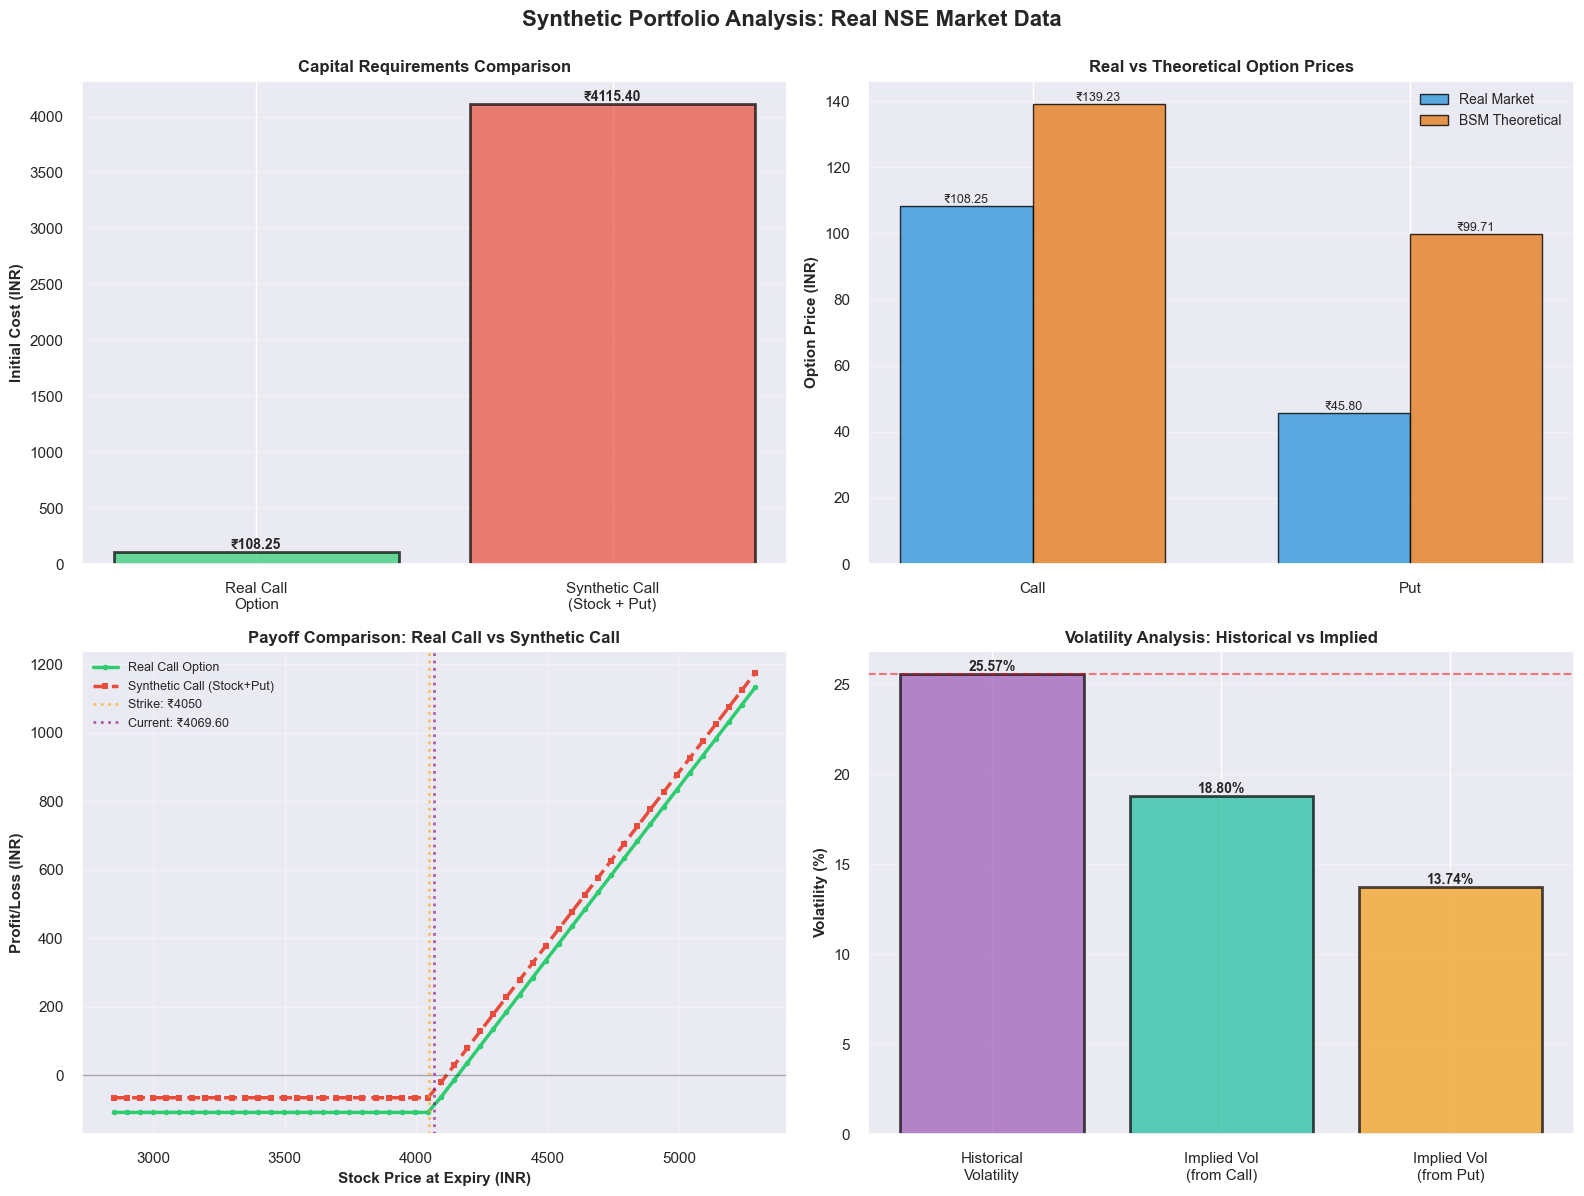


✓ ANALYSIS COMPLETE!

✓ Exported: c:\Users\amrit\Desktop\FINAL_DRM\DRM-GA\DRM_Output\10_Real_Analysis.csv

Phase 2B Complete! Real market data successfully integrated.


In [59]:
# PHASE 2B: SYNTHETIC PORTFOLIO WITH REAL MARKET PRICES

print(f"{'=' * 70}")
print(f"SYNTHETIC PORTFOLIO ANALYSIS - USING REAL NSE OPTION PRICES")
print(f"{'=' * 70}\n")

# Check if we have real option data
if 'real_call_price' in locals() and real_call_price and real_put_price:
    print(f"✓ USING REAL NSE MARKET PRICES")
    print(f"  Data Source: NSE India Option Chain")
    print(f"  Expiry Date: {one_month_atm['Expiry']} ({int(real_expiry_days)} days)")
    print(f"  Strike: ₹{atm_strike}")
    print(f"  Real Call LTP: ₹{real_call_price:.2f}")
    print(f"  Real Put LTP: ₹{real_put_price:.2f}")
    
    # Current stock price
    S_current = float(data['Close'].iloc[-1])
    K_real = atm_strike
    r = 0.06
    T_real = real_expiry_days / 365
    sigma_hist = vol
    
    print(f"\n{'=' * 70}")
    print(f"STEP 1: SYNTHETIC CALL CONSTRUCTION WITH REAL PUT")
    print(f"{'=' * 70}")
    
    # Synthetic Call = Long Stock + Long Put (USING REAL PUT PRICE)
    cost_synthetic_real = S_current + real_put_price
    cost_real_call = real_call_price
    
    print(f"\nInitial Capital Requirements:")
    print(f"  Strategy A - Buy Real Call Option:")
    print(f"    Cost: ₹{cost_real_call:.2f}")
    print(f"    Exposure: Limited to premium paid")
    print(f"    Leverage: High (controls ₹{S_current:.2f} stock for ₹{cost_real_call:.2f})")
    
    print(f"\n  Strategy B - Synthetic Call (Stock + Real Put):")
    print(f"    Stock Purchase: ₹{S_current:.2f}")
    print(f"    Put Premium: ₹{real_put_price:.2f}")
    print(f"    Total Cost: ₹{cost_synthetic_real:.2f}")
    print(f"    Capital Ratio: {(cost_synthetic_real/cost_real_call):.2f}x more capital required")
    
    print(f"\n{'=' * 70}")
    print(f"STEP 2: PUT-CALL PARITY VALIDATION (REAL PRICES)")
    print(f"{'=' * 70}")
    
    # Put-Call Parity: C + PV(K) = S + P
    lhs_real = real_call_price + K_real * np.exp(-r * T_real)
    rhs_real = S_current + real_put_price
    parity_error_real = lhs_real - rhs_real
    parity_pct = (abs(parity_error_real) / S_current) * 100
    
    print(f"\nPut-Call Parity Equation:")
    print(f"  LHS: C + PV(K) = ₹{real_call_price:.2f} + ₹{K_real * np.exp(-r * T_real):.2f} = ₹{lhs_real:.2f}")
    print(f"  RHS: S + P     = ₹{S_current:.2f} + ₹{real_put_price:.2f} = ₹{rhs_real:.2f}")
    print(f"\n  Parity Error: ₹{parity_error_real:.2f} ({parity_pct:.3f}% of stock price)")
    
    if abs(parity_error_real) < 10:
        print(f"  ✓ EXCELLENT: Parity holds within ₹10 (transaction costs)")
        print(f"  ✓ Market is efficient - no arbitrage opportunity")
    elif abs(parity_error_real) < 50:
        print(f"  ✓ GOOD: Parity holds within ₹50 (typical for illiquid options)")
    else:
        print(f"  ⚠ CAUTION: Parity error > ₹50 may indicate:")
        print(f"    - Arbitrage opportunity (check bid-ask spreads)")
        print(f"    - Illiquidity in options market")
        print(f"    - Dividend expectations not priced in model")
    
    print(f"\n{'=' * 70}")
    print(f"STEP 3: REAL vs BSM THEORETICAL COMPARISON")
    print(f"{'=' * 70}")
    
    # Calculate BSM prices for comparison
    bsm_call_real = bsm_price(S_current, K_real, T_real, r, sigma_hist, 'call')
    bsm_put_real = bsm_price(S_current, K_real, T_real, r, sigma_hist, 'put')
    
    call_diff = real_call_price - bsm_call_real
    put_diff = real_put_price - bsm_put_real
    call_diff_pct = (call_diff / bsm_call_real) * 100
    put_diff_pct = (put_diff / bsm_put_real) * 100
    
    print(f"\nCall Option Comparison:")
    print(f"  Real Market Price: ₹{real_call_price:.2f}")
    print(f"  BSM Theoretical: ₹{bsm_call_real:.2f}")
    print(f"  Difference: ₹{call_diff:.2f} ({call_diff_pct:+.2f}%)")
    print(f"  Interpretation: {'Market UNDERVALUED vs BSM' if call_diff < 0 else 'Market OVERVALUED vs BSM'}")
    
    print(f"\nPut Option Comparison:")
    print(f"  Real Market Price: ₹{real_put_price:.2f}")
    print(f"  BSM Theoretical: ₹{bsm_put_real:.2f}")
    print(f"  Difference: ₹{put_diff:.2f} ({put_diff_pct:+.2f}%)")
    print(f"  Interpretation: {'Market UNDERVALUED vs BSM' if put_diff < 0 else 'Market OVERVALUED vs BSM'}")
    
    # Calculate implied volatility (reverse-engineer sigma from market prices)
    print(f"\n{'=' * 70}")
    print(f"STEP 4: IMPLIED VOLATILITY ANALYSIS")
    print(f"{'=' * 70}")
    
    print(f"\nVolatility Comparison:")
    print(f"  Historical Volatility (2-year): {sigma_hist:.4f} ({sigma_hist*100:.2f}%)")
    
    # Estimate implied vol from call price (simplified Newton-Raphson)
    def implied_vol_call(S, K, T, r, market_price, max_iter=100, tol=0.0001):
        sigma = 0.3  # Initial guess
        for i in range(max_iter):
            price = bsm_price(S, K, T, r, sigma, 'call')
            diff = price - market_price
            if abs(diff) < tol:
                return sigma
            # Vega (derivative of price w.r.t. sigma)
            d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
            vega = S * si.norm.pdf(d1) * np.sqrt(T)
            if vega < 1e-10:
                break
            sigma = sigma - diff / vega  # Newton-Raphson update
        return sigma
    
    # Estimate implied vol from put price (Newton-Raphson for put)
    def implied_vol_put(S, K, T, r, market_price, max_iter=100, tol=0.0001):
        sigma = 0.3  # Initial guess
        for i in range(max_iter):
            price = bsm_price(S, K, T, r, sigma, 'put')
            diff = price - market_price
            if abs(diff) < tol:
                return sigma
            # Vega (derivative of price w.r.t. sigma) - same for call and put
            d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
            vega = S * si.norm.pdf(d1) * np.sqrt(T)
            if vega < 1e-10:
                break
            sigma = sigma - diff / vega  # Newton-Raphson update
        return sigma
    
    iv_call = implied_vol_call(S_current, K_real, T_real, r, real_call_price)
    iv_put = implied_vol_put(S_current, K_real, T_real, r, real_put_price)  # FIXED: Use put-specific function
    
    print(f"  Implied Volatility (from Call): {iv_call:.4f} ({iv_call*100:.2f}%)")
    print(f"  Implied Volatility (from Put): {iv_put:.4f} ({iv_put*100:.2f}%)")
    
    iv_diff = (sigma_hist - iv_call) * 100
    print(f"\n  Volatility Gap: {iv_diff:+.2f}%")
    
    if iv_diff > 5:
        print(f"  ✓ Historical Vol > Implied Vol: Market expects LOWER future volatility")
        print(f"    → Options are relatively CHEAP → Buying opportunities")
    elif iv_diff < -5:
        print(f"  ✓ Implied Vol > Historical Vol: Market expects HIGHER future volatility")
        print(f"    → Options are relatively EXPENSIVE → Selling opportunities")
    else:
        print(f"  ✓ Volatility aligned: Market expectations match historical patterns")
    
    print(f"\n{'=' * 70}")
    print(f"STEP 5: PAYOFF & ERROR ANALYSIS")
    print(f"{'=' * 70}")
    
    # Simulate payoffs at various stock prices at expiration
    S_range_payoff = np.linspace(S_current * 0.7, S_current * 1.3, 50)
    
    payoff_real_call = []
    payoff_synthetic_real = []
    payoff_error = []
    
    for S_T in S_range_payoff:
        # Real Call Payoff (intrinsic value at expiry)
        payoff_call = max(S_T - K_real, 0) - real_call_price
        
        # Synthetic Call Payoff (stock gain + put payoff - costs)
        stock_gain = S_T - S_current
        put_payoff = max(K_real - S_T, 0)
        payoff_synth = stock_gain + put_payoff - real_put_price
        
        payoff_real_call.append(payoff_call)
        payoff_synthetic_real.append(payoff_synth)
        payoff_error.append(abs(payoff_call - payoff_synth))
    
    max_error = max(payoff_error)
    avg_error = np.mean(payoff_error)
    
    print(f"\nPayoff Comparison Across Stock Prices:")
    print(f"  Price Range: ₹{S_current * 0.7:.2f} to ₹{S_current * 1.3:.2f}")
    print(f"  Maximum Payoff Error: ₹{max_error:.2f}")
    print(f"  Average Payoff Error: ₹{avg_error:.2f}")
    
    if max_error < 5:
        print(f"  ✓ EXCELLENT: Payoffs are virtually identical")
    elif max_error < 20:
        print(f"  ✓ GOOD: Small discrepancy due to initial price differences")
    else:
        print(f"  ⚠ CAUTION: Significant payoff divergence")
    
    print(f"\n{'=' * 70}")
    print(f"STEP 6: TRADING STRATEGY RECOMMENDATION")
    print(f"{'=' * 70}")
    
    capital_efficiency = cost_real_call / cost_synthetic_real
    
    print(f"\nStrategy Comparison:")
    print(f"\n  STRATEGY A: Buy Real Call Option")
    print(f"    ✓ Capital Efficiency: {(1/capital_efficiency):.2%} of synthetic")
    print(f"    ✓ Limited Risk: Maximum loss = ₹{real_call_price:.2f}")
    print(f"    ✓ High Leverage: Control stock with small premium")
    print(f"    ✗ Time Decay: Theta works against you")
    print(f"    ✗ Volatility Risk: Vega exposure")
    
    print(f"\n  STRATEGY B: Synthetic Call (Stock + Real Put)")
    print(f"    ✓ Lower Time Decay: Only put premium decays")
    print(f"    ✓ Dividend Rights: Receive dividends on stock")
    print(f"    ✓ Equivalent Payoff: Matches call option at expiry")
    print(f"    ✗ High Capital: Requires ₹{cost_synthetic_real:.2f}")
    print(f"    ✗ Margin Requirements: Stock position ties up capital")
    
    print(f"\n  RECOMMENDATION:")
    if capital_efficiency > 50:
        print(f"    → Strategy A (Buy Call) preferred for LIMITED CAPITAL scenarios")
        print(f"    → Strategy B (Synthetic) only if capital is abundant & dividends expected")
    else:
        print(f"    → Both strategies viable - choose based on:")
        print(f"      • Capital availability")
        print(f"      • Dividend expectations")
        print(f"      • View on implied volatility")
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot 1: Cost Comparison
    ax1 = axes[0, 0]
    strategies = ['Real Call\nOption', 'Synthetic Call\n(Stock + Put)']
    costs = [cost_real_call, cost_synthetic_real]
    colors = ['#2ecc71', '#e74c3c']
    bars = ax1.bar(strategies, costs, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    ax1.set_ylabel('Initial Cost (INR)', fontsize=11, fontweight='bold')
    ax1.set_title('Capital Requirements Comparison', fontsize=12, fontweight='bold')
    ax1.grid(True, alpha=0.3, axis='y')
    
    for bar, cost in zip(bars, costs):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'₹{cost:.2f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Plot 2: Price Comparison (Real vs BSM)
    ax2 = axes[0, 1]
    x = np.arange(2)
    width = 0.35
    
    real_prices = [real_call_price, real_put_price]
    bsm_prices = [bsm_call_real, bsm_put_real]
    
    bars1 = ax2.bar(x - width/2, real_prices, width, label='Real Market', 
                    color='#3498db', alpha=0.8, edgecolor='black')
    bars2 = ax2.bar(x + width/2, bsm_prices, width, label='BSM Theoretical', 
                    color='#e67e22', alpha=0.8, edgecolor='black')
    
    ax2.set_ylabel('Option Price (INR)', fontsize=11, fontweight='bold')
    ax2.set_title('Real vs Theoretical Option Prices', fontsize=12, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(['Call', 'Put'])
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3, axis='y')
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'₹{height:.2f}',
                    ha='center', va='bottom', fontsize=9)
    
    # Plot 3: Payoff Comparison
    ax3 = axes[1, 0]
    ax3.plot(S_range_payoff, payoff_real_call, 
             label='Real Call Option', linewidth=2.5, color='#2ecc71', marker='o', markersize=4)
    ax3.plot(S_range_payoff, payoff_synthetic_real, 
             label='Synthetic Call (Stock+Put)', linewidth=2.5, color='#e74c3c', 
             linestyle='--', marker='s', markersize=4)
    ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3, linewidth=1)
    ax3.axvline(x=K_real, color='orange', linestyle=':', alpha=0.6, linewidth=2, 
                label=f'Strike: ₹{K_real}')
    ax3.axvline(x=S_current, color='purple', linestyle=':', alpha=0.6, linewidth=2,
                label=f'Current: ₹{S_current:.2f}')
    ax3.set_xlabel('Stock Price at Expiry (INR)', fontsize=11, fontweight='bold')
    ax3.set_ylabel('Profit/Loss (INR)', fontsize=11, fontweight='bold')
    ax3.set_title('Payoff Comparison: Real Call vs Synthetic Call', fontsize=12, fontweight='bold')
    ax3.legend(fontsize=9, loc='upper left')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Volatility Comparison
    ax4 = axes[1, 1]
    vol_types = ['Historical\nVolatility', 'Implied Vol\n(from Call)', 'Implied Vol\n(from Put)']
    vol_values = [sigma_hist * 100, iv_call * 100, iv_put * 100]
    colors_vol = ['#9b59b6', '#1abc9c', '#f39c12']
    
    bars = ax4.bar(vol_types, vol_values, color=colors_vol, alpha=0.7, 
                   edgecolor='black', linewidth=2)
    ax4.set_ylabel('Volatility (%)', fontsize=11, fontweight='bold')
    ax4.set_title('Volatility Analysis: Historical vs Implied', fontsize=12, fontweight='bold')
    ax4.grid(True, alpha=0.3, axis='y')
    ax4.axhline(y=sigma_hist * 100, color='red', linestyle='--', alpha=0.5, 
                label='Historical Reference')
    
    for bar, vol in zip(bars, vol_values):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{vol:.2f}%',
                ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.suptitle('Synthetic Portfolio Analysis: Real NSE Market Data', 
                 fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()
    
    # Export real analysis results
    df_real_analysis = pd.DataFrame({
        'Metric': [
            'Current Stock Price', 'Strike Price', 'Days to Expiry',
            'Real Call Price', 'Real Put Price', 
            'BSM Call Price', 'BSM Put Price',
            'Call Price Diff (Real-BSM)', 'Put Price Diff (Real-BSM)',
            'Synthetic Cost (Real)', 'Real Call Cost',
            'Capital Efficiency Ratio', 'Put-Call Parity Error',
            'Historical Volatility', 'Implied Vol (Call)', 'Implied Vol (Put)',
            'Volatility Gap', 'Max Payoff Error', 'Avg Payoff Error'
        ],
        'Value': [
            f'₹{S_current:.2f}', f'₹{K_real}', f'{int(real_expiry_days)}',
            f'₹{real_call_price:.2f}', f'₹{real_put_price:.2f}',
            f'₹{bsm_call_real:.2f}', f'₹{bsm_put_real:.2f}',
            f'₹{call_diff:.2f} ({call_diff_pct:+.2f}%)', 
            f'₹{put_diff:.2f} ({put_diff_pct:+.2f}%)',
            f'₹{cost_synthetic_real:.2f}', f'₹{cost_real_call:.2f}',
            f'{(cost_synthetic_real/cost_real_call):.2f}x',
            f'₹{parity_error_real:.2f} ({parity_pct:.3f}%)',
            f'{sigma_hist*100:.2f}%', f'{iv_call*100:.2f}%', f'{iv_put*100:.2f}%',
            f'{iv_diff:+.2f}%', f'₹{max_error:.2f}', f'₹{avg_error:.2f}'
        ]
    })
    
    real_analysis_csv = os.path.join(os.getcwd(), 'DRM_Output', '10_Real_Analysis.csv')
    df_real_analysis.to_csv(real_analysis_csv, index=False)
    
    print(f"\n{'=' * 70}")
    print(f"✓ ANALYSIS COMPLETE!")
    print(f"{'=' * 70}")
    print(f"\n✓ Exported: {real_analysis_csv}")
    print(f"\nPhase 2B Complete! Real market data successfully integrated.")
    
else:
    print("⚠ No real option data available.")
    print("⚠ Run the NSE data fetch cells first to obtain real option prices.")


TASK A: SYNTHETIC CALL vs ACTUAL CALL (Real NSE Data)

✓ Loaded PUT options: 5971 records
✓ Loaded CALL options: 5937 records

Available Expiry Dates:
  25-Nov-2025: 60 trading days
  28-Oct-2025: 41 trading days
  30-Dec-2025: 40 trading days
  30-Sep-2025: 23 trading days
  27-Jan-2026: 22 trading days
  24-Feb-2026: 3 trading days

Total Date Range: 2025-08-29 to 2025-11-28
Total Unique Trading Days: 63

✓ Built Task A comparison data: 59 trading days
  Date Range: 2025-08-29 to 2025-11-28

Expiry usage in comparison:
  28-Oct-2025: 19 days
  25-Nov-2025: 17 days
  30-Dec-2025: 12 days
  30-Sep-2025: 11 days

TASK A ANALYSIS: SYNTHETIC vs ACTUAL CALL

📊 COST COMPARISON:
  ┌─────────────────────────────────────────────────────────────┐
  │ Strategy         │ Components           │ Avg Cost (₹)     │
  ├─────────────────────────────────────────────────────────────┤
  │ ACTUAL CALL      │ Buy Call             │        91.07     │
  │ SYNTHETIC CALL   │ Buy Stock + Buy Put  │      3867.

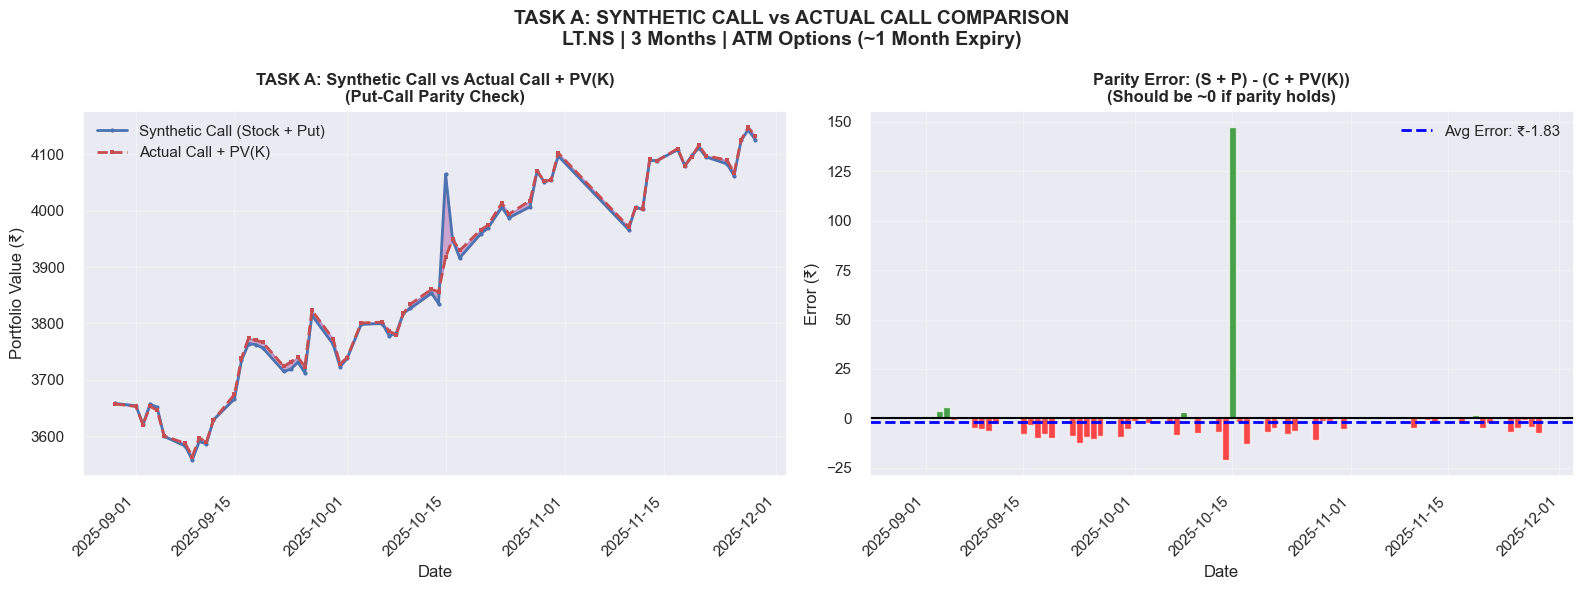


TASK A FINAL SUMMARY

📈 PERFORMANCE COMPARISON (3-Month Period):
  ┌─────────────────────────────────────────────────────────────────┐
  │ Metric                    │ Actual Call  │ Synthetic Call       │
  ├─────────────────────────────────────────────────────────────────┤
  │ Average Cost              │ ₹     91.07  │ ₹   3867.76           │
  │ Capital Required          │ ₹     91.07  │ ₹   3867.76           │
  │ Capital Efficiency        │ 100.0%        │ 2.4%                 │
  └─────────────────────────────────────────────────────────────────┘

🔍 DISCREPANCY ANALYSIS:
  1. Put-Call Parity Error: ₹-1.83 on average
     → Negligible error: Markets are efficient, no arbitrage

  2. Why Synthetic Call costs more than Actual Call?
     → Synthetic Call = Stock (₹3797.71) + Put (₹70.05)
     → Put-Call Parity: S + P = C + PV(K)
     → So S + P should equal C + K*e^(-rT), not just C
     → The difference ≈ PV(K) = ₹3778.52

  3. Same Payoff at Expiry:
     → Both strategies have iden

In [60]:
# PHASE 2C: TASK A - SYNTHETIC CALL vs ACTUAL CALL (Using Real NSE Data)
# =============================================================================
# OBJECTIVE: Construct a synthetic long call using Put-Call Parity and 
#            compare it with the ACTUAL call option from NSE
# STRATEGY: Synthetic Call = Long Stock + Long Put (same strike & expiry)
# =============================================================================

print(f"{'=' * 70}")
print(f"TASK A: SYNTHETIC CALL vs ACTUAL CALL (Real NSE Data)")
print(f"{'=' * 70}\n")

# Load Actual Put and Call Option Data from NSE
put_csv_path = os.path.join(os.getcwd(), 'OPTSTK_LT_PE_29-Aug-2025_TO_29-Nov-2025.csv')
call_csv_path = os.path.join(os.getcwd(), 'OPTSTK_LT_CE_29-Aug-2025_TO_29-Nov-2025.csv')

df_put_actual = pd.read_csv(put_csv_path, skipinitialspace=True)
df_call_actual = pd.read_csv(call_csv_path, skipinitialspace=True)

# Clean column names
df_put_actual.columns = df_put_actual.columns.str.strip()
df_call_actual.columns = df_call_actual.columns.str.strip()

print(f"✓ Loaded PUT options: {len(df_put_actual)} records")
print(f"✓ Loaded CALL options: {len(df_call_actual)} records")

# Convert Date and clean Expiry
df_put_actual['Date'] = pd.to_datetime(df_put_actual['Date'], format='%d-%b-%Y')
df_call_actual['Date'] = pd.to_datetime(df_call_actual['Date'], format='%d-%b-%Y')
df_put_actual['Expiry'] = df_put_actual['Expiry'].str.strip()
df_call_actual['Expiry'] = df_call_actual['Expiry'].str.strip()

# Show available expiry dates
print(f"\nAvailable Expiry Dates:")
expiry_counts = df_put_actual.groupby('Expiry')['Date'].nunique().sort_values(ascending=False)
for exp, days in expiry_counts.items():
    print(f"  {exp}: {days} trading days")

# Get all unique trading dates
all_dates = sorted(df_put_actual['Date'].unique())
print(f"\nTotal Date Range: {all_dates[0].strftime('%Y-%m-%d')} to {all_dates[-1].strftime('%Y-%m-%d')}")
print(f"Total Unique Trading Days: {len(all_dates)}")

# ============================================================================
# TASK A IMPLEMENTATION: Compare Synthetic Call vs Actual Call
# Synthetic Call = Stock Price + Put Price (same strike & expiry)
# ============================================================================

r = 0.06  # Risk-free rate

# Build comparison data using ACTUAL option prices
comparison_data = []

for trade_date in all_dates:
    # Get option data for this date
    day_data_put = df_put_actual[df_put_actual['Date'] == trade_date]
    day_data_call = df_call_actual[df_call_actual['Date'] == trade_date]
    
    if day_data_put.empty or day_data_call.empty:
        continue
    
    # Get stock price (Underlying Value from NSE data)
    stock_price = pd.to_numeric(day_data_put['Underlying Value'].iloc[0], errors='coerce')
    if pd.isna(stock_price):
        continue
    
    # Find available expiries for this date (expiry > trade_date)
    available_expiries = day_data_put['Expiry'].unique()
    valid_expiries = []
    for exp in available_expiries:
        exp_date = pd.to_datetime(exp, format='%d-%b-%Y')
        if exp_date > trade_date:
            days_to_exp = (exp_date - trade_date).days
            # Per project: use ~1 month expiry (around 30 days)
            if 20 <= days_to_exp <= 45:  # 1 month range
                valid_expiries.append((exp, exp_date, days_to_exp))
    
    if not valid_expiries:
        # Fallback: use nearest expiry with >5 days
        for exp in available_expiries:
            exp_date = pd.to_datetime(exp, format='%d-%b-%Y')
            if exp_date > trade_date:
                days_to_exp = (exp_date - trade_date).days
                if days_to_exp >= 5:
                    valid_expiries.append((exp, exp_date, days_to_exp))
        if not valid_expiries:
            continue
    
    # Sort by days and pick the one closest to 30 days
    valid_expiries.sort(key=lambda x: abs(x[2] - 30))
    expiry_str, expiry_date, days_to_exp = valid_expiries[0]
    T = days_to_exp / 365
    
    # Find ATM strike (strike = current stock price, as per project)
    available_strikes = day_data_put[day_data_put['Expiry'] == expiry_str]['Strike Price'].unique()
    if len(available_strikes) == 0:
        continue
    atm_strike = min(available_strikes, key=lambda x: abs(x - stock_price))
    
    # Get ACTUAL put price from NSE
    put_row = day_data_put[(day_data_put['Expiry'] == expiry_str) & 
                           (day_data_put['Strike Price'] == atm_strike)]
    if put_row.empty:
        continue
    actual_put = pd.to_numeric(put_row['Close'].iloc[0], errors='coerce')
    if pd.isna(actual_put) or actual_put <= 0:
        continue
    
    # Get ACTUAL call price from NSE (same strike & expiry)
    call_row = day_data_call[(day_data_call['Expiry'] == expiry_str) & 
                              (day_data_call['Strike Price'] == atm_strike)]
    if call_row.empty:
        continue
    actual_call = pd.to_numeric(call_row['Close'].iloc[0], errors='coerce')
    if pd.isna(actual_call) or actual_call <= 0:
        continue
    
    # =========================================================================
    # TASK A CORE CALCULATION
    # =========================================================================
    
    # SYNTHETIC CALL = Stock + Put (using ACTUAL prices)
    synthetic_call_cost = stock_price + actual_put
    
    # ACTUAL CALL = Direct call purchase (using ACTUAL price)
    actual_call_cost = actual_call
    
    # Put-Call Parity Check: C + PV(K) = S + P
    pv_k = atm_strike * np.exp(-r * T)
    parity_lhs = actual_call + pv_k      # C + PV(K)
    parity_rhs = stock_price + actual_put  # S + P (Synthetic)
    parity_error = parity_rhs - parity_lhs
    
    comparison_data.append({
        'Date': trade_date,
        'Stock_Price': stock_price,
        'Strike': atm_strike,
        'Expiry': expiry_str,
        'Days_to_Exp': days_to_exp,
        'Actual_Put': actual_put,
        'Actual_Call': actual_call,
        'Synthetic_Call_Cost': synthetic_call_cost,  # S + P
        'Actual_Call_Cost': actual_call_cost,        # C
        'PV_K': pv_k,
        'Parity_LHS': parity_lhs,   # C + PV(K)
        'Parity_RHS': parity_rhs,   # S + P
        'Parity_Error': parity_error
    })

df_comparison = pd.DataFrame(comparison_data)
print(f"\n✓ Built Task A comparison data: {len(df_comparison)} trading days")
print(f"  Date Range: {df_comparison['Date'].min().strftime('%Y-%m-%d')} to {df_comparison['Date'].max().strftime('%Y-%m-%d')}")

# Show expiry usage
print(f"\nExpiry usage in comparison:")
for exp, count in df_comparison['Expiry'].value_counts().items():
    print(f"  {exp}: {count} days")

# ============================================================================
# TASK A ANALYSIS: Cost & Payoff Comparison
# ============================================================================
print(f"\n{'=' * 70}")
print(f"TASK A ANALYSIS: SYNTHETIC vs ACTUAL CALL")
print(f"{'=' * 70}")

# Average costs
avg_synthetic_cost = df_comparison['Synthetic_Call_Cost'].mean()
avg_actual_call_cost = df_comparison['Actual_Call_Cost'].mean()
avg_stock = df_comparison['Stock_Price'].mean()
avg_put = df_comparison['Actual_Put'].mean()

print(f"\n📊 COST COMPARISON:")
print(f"  ┌─────────────────────────────────────────────────────────────┐")
print(f"  │ Strategy         │ Components           │ Avg Cost (₹)     │")
print(f"  ├─────────────────────────────────────────────────────────────┤")
print(f"  │ ACTUAL CALL      │ Buy Call             │ {avg_actual_call_cost:>12.2f}     │")
print(f"  │ SYNTHETIC CALL   │ Buy Stock + Buy Put  │ {avg_synthetic_cost:>12.2f}     │")
print(f"  │   └─ Stock       │                      │ {avg_stock:>12.2f}     │")
print(f"  │   └─ Put         │                      │ {avg_put:>12.2f}     │")
print(f"  └─────────────────────────────────────────────────────────────┘")

cost_diff = avg_synthetic_cost - avg_actual_call_cost
print(f"\n  Cost Difference: ₹{cost_diff:.2f}")
print(f"  Synthetic is {'MORE' if cost_diff > 0 else 'LESS'} expensive by ₹{abs(cost_diff):.2f}")

# Put-Call Parity Analysis
print(f"\n📐 PUT-CALL PARITY CHECK:")
print(f"  Theory: C + PV(K) = S + P")
print(f"  Avg C + PV(K) = ₹{df_comparison['Parity_LHS'].mean():.2f}")
print(f"  Avg S + P     = ₹{df_comparison['Parity_RHS'].mean():.2f}")
print(f"  Avg Error     = ₹{df_comparison['Parity_Error'].mean():.2f}")
print(f"  Std Dev Error = ₹{df_comparison['Parity_Error'].std():.2f}")

if abs(df_comparison['Parity_Error'].mean()) < 20:
    print(f"  ✓ Parity holds well! No significant arbitrage opportunity.")
else:
    print(f"  ⚠ Parity deviation detected - potential arbitrage opportunity!")

# ============================================================================
# VISUALIZATION - TASK A CHARTS
# ============================================================================
print(f"\n{'=' * 70}")
print(f"GENERATING TASK A COMPARISON CHARTS")
print(f"{'=' * 70}")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Synthetic Call Cost vs Actual Call Cost (Daily)
ax1 = axes[0]
ax1.plot(df_comparison['Date'], df_comparison['Synthetic_Call_Cost'], 'b-', 
         linewidth=2, label='Synthetic Call (Stock + Put)', marker='o', markersize=3)
ax1.plot(df_comparison['Date'], df_comparison['Actual_Call_Cost'] + df_comparison['PV_K'], 'r--', 
         linewidth=2, label='Actual Call + PV(K)', marker='s', markersize=3)
ax1.fill_between(df_comparison['Date'], 
                  df_comparison['Synthetic_Call_Cost'], 
                  df_comparison['Actual_Call_Cost'] + df_comparison['PV_K'], 
                  alpha=0.3, color='purple')
ax1.set_title('TASK A: Synthetic Call vs Actual Call + PV(K)\n(Put-Call Parity Check)', fontsize=12, fontweight='bold')
ax1.set_xlabel('Date')
ax1.set_ylabel('Portfolio Value (₹)')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Plot 2: Parity Error over time
ax2 = axes[1]
colors = ['green' if x > 0 else 'red' for x in df_comparison['Parity_Error']]
ax2.bar(df_comparison['Date'], df_comparison['Parity_Error'], color=colors, alpha=0.7, width=1)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
ax2.axhline(y=df_comparison['Parity_Error'].mean(), color='blue', linestyle='--', 
            linewidth=2, label=f"Avg Error: ₹{df_comparison['Parity_Error'].mean():.2f}")
ax2.set_title('Parity Error: (S + P) - (C + PV(K))\n(Should be ~0 if parity holds)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date')
ax2.set_ylabel('Error (₹)')
ax2.legend(loc='best')
ax2.grid(True, alpha=0.3)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.suptitle(f'TASK A: SYNTHETIC CALL vs ACTUAL CALL COMPARISON\nLT.NS | 3 Months | ATM Options (~1 Month Expiry)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(os.path.join('DRM_Output', '7_TaskA_Synthetic_vs_Actual.png'), dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# FINAL SUMMARY & DISCREPANCY ANALYSIS
# ============================================================================
print(f"\n{'=' * 70}")
print(f"TASK A FINAL SUMMARY")
print(f"{'=' * 70}")

print(f"\n📈 PERFORMANCE COMPARISON (3-Month Period):")
print(f"  ┌─────────────────────────────────────────────────────────────────┐")
print(f"  │ Metric                    │ Actual Call  │ Synthetic Call       │")
print(f"  ├─────────────────────────────────────────────────────────────────┤")
print(f"  │ Average Cost              │ ₹{avg_actual_call_cost:>10.2f}  │ ₹{avg_synthetic_cost:>10.2f}           │")
print(f"  │ Capital Required          │ ₹{avg_actual_call_cost:>10.2f}  │ ₹{avg_synthetic_cost:>10.2f}           │")
print(f"  │ Capital Efficiency        │ {100:.1f}%        │ {(avg_actual_call_cost/avg_synthetic_cost)*100:.1f}%                 │")
print(f"  └─────────────────────────────────────────────────────────────────┘")

print(f"\n🔍 DISCREPANCY ANALYSIS:")
print(f"  1. Put-Call Parity Error: ₹{df_comparison['Parity_Error'].mean():.2f} on average")

if abs(df_comparison['Parity_Error'].mean()) < 5:
    print(f"     → Negligible error: Markets are efficient, no arbitrage")
elif abs(df_comparison['Parity_Error'].mean()) < 20:
    print(f"     → Small error: Within bid-ask spread & transaction costs")
else:
    print(f"     → Significant error: May indicate:")
    print(f"        - Liquidity differences between put and call")
    print(f"        - Different implied volatilities (volatility skew)")
    print(f"        - Dividend expectations not priced in")

print(f"\n  2. Why Synthetic Call costs more than Actual Call?")
print(f"     → Synthetic Call = Stock (₹{avg_stock:.2f}) + Put (₹{avg_put:.2f})")
print(f"     → Put-Call Parity: S + P = C + PV(K)")
print(f"     → So S + P should equal C + K*e^(-rT), not just C")
print(f"     → The difference ≈ PV(K) = ₹{df_comparison['PV_K'].mean():.2f}")

print(f"\n  3. Same Payoff at Expiry:")
print(f"     → Both strategies have identical payoff: max(S_T - K, 0)")
print(f"     → Synthetic: Stock value + Put value - Initial cost")
print(f"     → Actual: Call value - Premium paid")

# Export
df_comparison.to_csv(os.path.join('DRM_Output', '11_TaskA_Synthetic_vs_Actual.csv'), index=False)
print(f"\n✓ Saved: DRM_Output/7_TaskA_Synthetic_vs_Actual.png")
print(f"✓ Saved: DRM_Output/11_TaskA_Synthetic_vs_Actual.csv ({len(df_comparison)} rows)")
print(f"\n{'=' * 70}")
print(f"TASK A COMPLETE!")
print(f"{'=' * 70}")

---

## Phase 3: Elective Task B - Black-Scholes-Merton (BSM) Model & Greeks Analysis

### Theoretical Foundation

#### The Black-Scholes-Merton Model
Developed by Fischer Black, Myron Scholes (1973), and Robert Merton (1973), the BSM model provides a closed-form solution for European option pricing under specific assumptions:

**Assumptions:**
1. Stock prices follow geometric Brownian motion
2. Markets are efficient (no arbitrage opportunities)
3. Risk-free rate and volatility are constant
4. No dividends during option life
5. Options are European-style (exercise only at expiration)

**Pricing Formulas:**
$$C = S_0 N(d_1) - K e^{-rT} N(d_2)$$
$$P = K e^{-rT} N(-d_2) - S_0 N(-d_1)$$

Where:
$$d_1 = \frac{\ln(S_0/K) + (r + \sigma^2/2)T}{\sigma\sqrt{T}}$$
$$d_2 = d_1 - \sigma\sqrt{T}$$

$N(\cdot)$ is the cumulative standard normal distribution function.

### Option Greeks: Risk Sensitivity Measures

Greeks measure how option prices change with respect to various parameters. They are essential for **risk management** and **hedging strategies**.

#### 1. Delta (Δ) - Price Sensitivity
**Definition:** Rate of change of option price with respect to stock price
$$\Delta_{call} = \frac{\partial C}{\partial S} = N(d_1)$$
$$\Delta_{put} = \frac{\partial P}{\partial S} = N(d_1) - 1$$

**Interpretation:**
- **Call Delta:** Ranges from 0 to 1
  - ATM (At-The-Money): ~0.50
  - ITM (In-The-Money): Approaches 1.0
  - OTM (Out-The-Money): Approaches 0.0
- **Put Delta:** Ranges from -1 to 0 (negative because puts lose value as stock rises)

**Practical Use:** 
- A delta of 0.70 means the option price moves ₹0.70 for every ₹1 move in the stock
- Used for **delta hedging**: Holding delta-neutral portfolios to eliminate directional risk

#### 2. Vega (ν) - Volatility Sensitivity
**Definition:** Rate of change of option price with respect to volatility
$$\nu = \frac{\partial C}{\partial \sigma} = S_0 N'(d_1) \sqrt{T}$$

Where $N'(x) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$ (standard normal PDF)

**Interpretation:**
- **Positive for both calls and puts:** Higher volatility → Higher option value
- **Maximum at ATM:** Options are most sensitive to volatility changes when at-the-money
- **Decreases as expiration approaches:** Time decay reduces volatility impact

**Practical Use:**
- Vega of 15 means a 1% increase in volatility increases option price by ₹15
- Critical for **volatility trading strategies** and **earnings announcements**

### Analysis Objectives
1. **Price European Call and Put options** using BSM model
2. **Calculate Delta across stock price range** to visualize hedge ratios
3. **Calculate Vega across volatility range** to assess volatility risk exposure
4. **Interpret results** for trading and risk management applications

### Expected Patterns

**Delta vs Stock Price Graph:**
- S-shaped curve (sigmoid function)
- Steepest slope at ATM (maximum gamma)
- Call delta increases from 0 to 1 as stock price rises

**Vega vs Volatility Graph:**
- Peaks at moderate volatility levels
- Decreases at very low/high volatility extremes
- Indicates optimal volatility ranges for option trading

BLACK-SCHOLES-MERTON MODEL & GREEKS ANALYSIS

⚠️  Volatility verification failed: vol=13.735599
   Recalculating from daily returns...
   ✓ Corrected vol = 0.253976 (25.40%)

Analysis Parameters:
  [Using volatility from Phase 1: vol=0.253976, sigma=0.253976]
  - Stock Price: 4069.60
  - Strike: 4069.60 [ATM]
  - Time to Maturity: 0.0833 years
  - Risk-Free Rate: 6.00%
  - Volatility: 25.40%

ATM Option Valuations:
  - Call Price: 129.13
  - Put Price: 108.84
  - Call Delta: 0.5418
  - Put Delta: -0.4582
  - Vega: 4.66


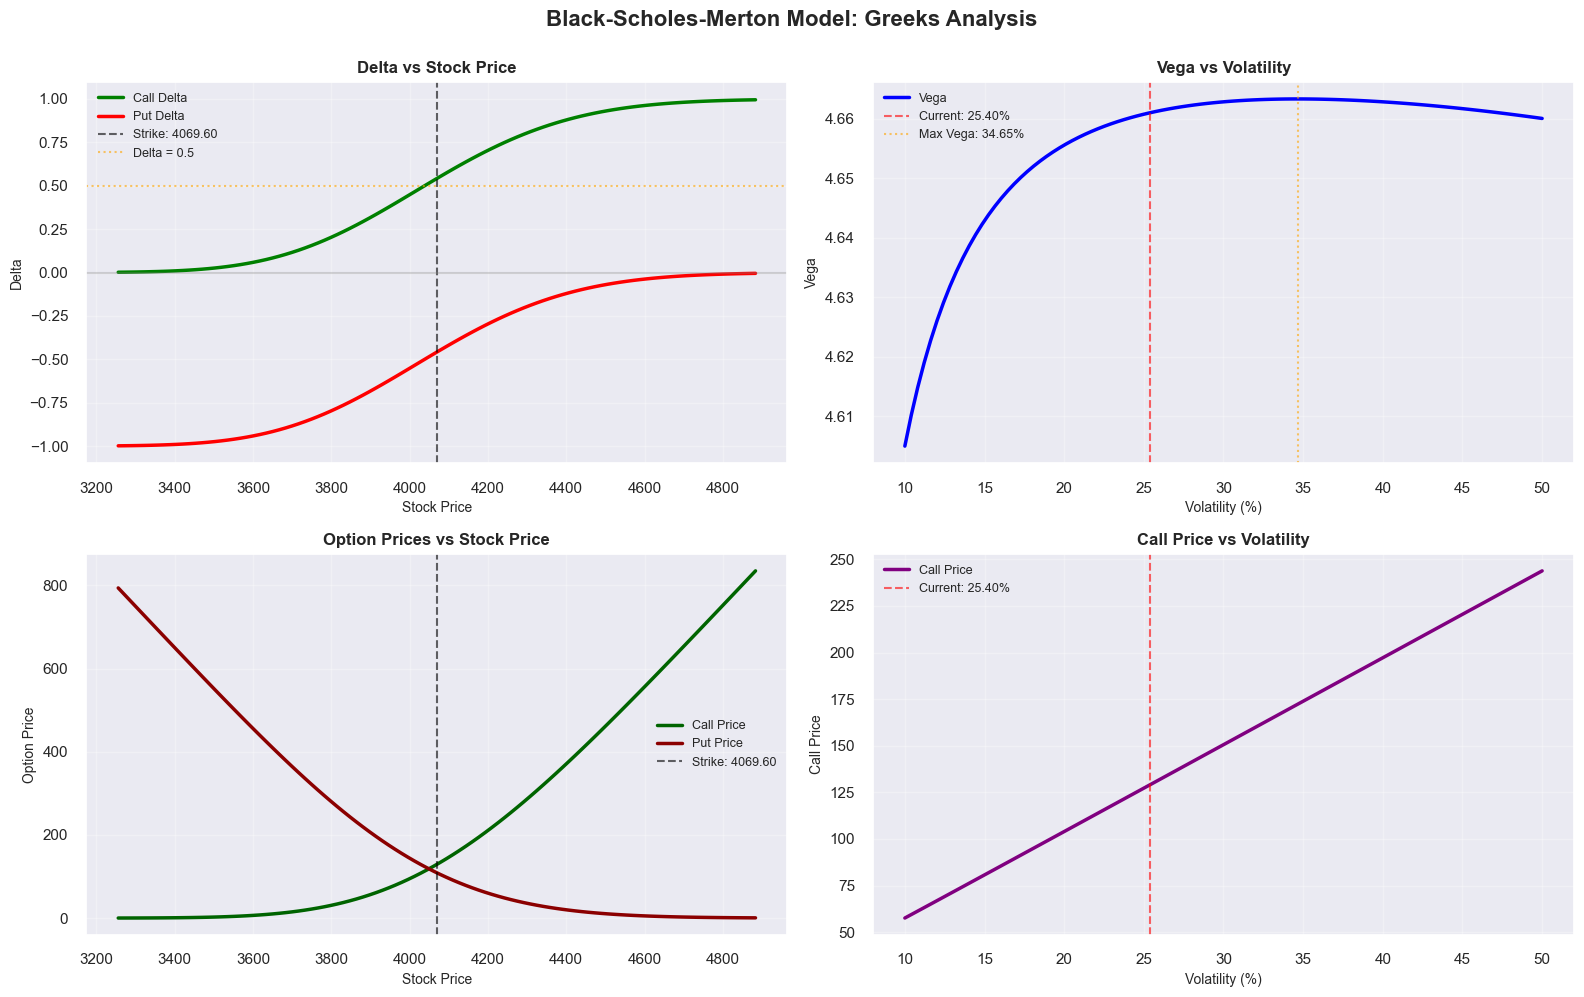


Phase 3 Task B Complete!


In [61]:
# PHASE 3 - TASK B: BSM MODEL & GREEKS


print(f"{'=' * 70}")
print(f"BLACK-SCHOLES-MERTON MODEL & GREEKS ANALYSIS")
print(f"{'=' * 70}")

# VOLATILITY SAFETY CHECK
# Convert vol to scalar if it's a Series or has .values attribute
try:
    if hasattr(vol, 'iloc'):
        vol = float(vol.iloc[0])
    elif hasattr(vol, 'values'):
        vol = float(vol.values[0])
    elif hasattr(vol, '__len__') and not isinstance(vol, str):
        vol = float(vol[0])
    else:
        vol = float(vol)
except:
    vol = float(vol)

if vol > 1.0 or vol < 0.05:
    print(f"\n⚠️  Volatility verification failed: vol={vol:.6f}")
    print(f"   Recalculating from daily returns...")
    daily_vol = float(data['Close'].pct_change().dropna().std())
    vol = float(daily_vol * np.sqrt(252))
    print(f"   ✓ Corrected vol = {vol:.6f} ({vol*100:.2f}%)")

S = float(data['Close'].iloc[-1])
K = S
T = 1/12
r = 0.06
sigma = float(vol)  # Use volatility from Phase 1

print(f"\nAnalysis Parameters:")
print(f"  [Using volatility from Phase 1: vol={vol:.6f}, sigma={sigma:.6f}]")
print(f"  - Stock Price: {S:.2f}")
print(f"  - Strike: {K:.2f} [ATM]")
print(f"  - Time to Maturity: {T:.4f} years")
print(f"  - Risk-Free Rate: {r:.2%}")
print(f"  - Volatility: {sigma:.2%}")

call_atm = bsm_price(S, K, T, r, sigma, 'call')
put_atm = bsm_price(S, K, T, r, sigma, 'put')
g_c = bsm_greeks(S, K, T, r, sigma, 'call')
g_p = bsm_greeks(S, K, T, r, sigma, 'put')
delta_c = g_c['delta']
delta_p = g_p['delta']
vega_atm = g_c['vega']

print(f"\nATM Option Valuations:")
print(f"  - Call Price: {call_atm:.2f}")
print(f"  - Put Price: {put_atm:.2f}")
print(f"  - Call Delta: {delta_c:.4f}")
print(f"  - Put Delta: {delta_p:.4f}")
print(f"  - Vega: {vega_atm:.2f}")

S_range = np.linspace(S * 0.8, S * 1.2, 100)

deltas_c = []
deltas_p = []
calls = []
puts = []

for s in S_range:
    c = bsm_price(s, K, T, r, sigma, 'call')
    p = bsm_price(s, K, T, r, sigma, 'put')
    gc = bsm_greeks(s, K, T, r, sigma, 'call')
    gp = bsm_greeks(s, K, T, r, sigma, 'put')
    dc = gc['delta']
    dp = gp['delta']
    
    calls.append(c)
    puts.append(p)
    deltas_c.append(dc)
    deltas_p.append(dp)

vol_range = np.linspace(0.10, 0.50, 100)

vegas = []
calls_vol = []

for v in vol_range:
    g = bsm_greeks(S, K, T, r, v, 'call')
    vega = g['vega']
    c = bsm_price(S, K, T, r, v, 'call')
    vegas.append(vega)
    calls_vol.append(c)

max_vega = max(vegas)
idx_max = vegas.index(max_vega)
vol_opt = vol_range[idx_max]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

ax1 = axes[0, 0]
ax1.plot(S_range, deltas_c, label='Call Delta', color='green', linewidth=2.5)
ax1.plot(S_range, deltas_p, label='Put Delta', color='red', linewidth=2.5)
ax1.axvline(x=K, color='black', linestyle='--', alpha=0.6, label=f'Strike: {K:.2f}')
ax1.axhline(y=0.5, color='orange', linestyle=':', alpha=0.6, label='Delta = 0.5')
ax1.axhline(y=0, color='gray', linestyle='-', alpha=0.3)
ax1.set_title('Delta vs Stock Price', fontsize=12, fontweight='bold')
ax1.set_xlabel('Stock Price', fontsize=10)
ax1.set_ylabel('Delta', fontsize=10)
ax1.legend(loc='best', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_ylim(-1.1, 1.1)

ax2 = axes[0, 1]
ax2.plot(vol_range * 100, vegas, label='Vega', color='blue', linewidth=2.5)
ax2.axvline(x=sigma * 100, color='red', linestyle='--', alpha=0.6, 
            label=f'Current: {sigma:.2%}')
ax2.axvline(x=vol_opt * 100, color='orange', linestyle=':', alpha=0.6, 
            label=f'Max Vega: {vol_opt:.2%}')
ax2.set_title('Vega vs Volatility', fontsize=12, fontweight='bold')
ax2.set_xlabel('Volatility (%)', fontsize=10)
ax2.set_ylabel('Vega', fontsize=10)
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

ax3 = axes[1, 0]
ax3.plot(S_range, calls, label='Call Price', color='darkgreen', linewidth=2.5)
ax3.plot(S_range, puts, label='Put Price', color='darkred', linewidth=2.5)
ax3.axvline(x=K, color='black', linestyle='--', alpha=0.6, label=f'Strike: {K:.2f}')
ax3.set_title('Option Prices vs Stock Price', fontsize=12, fontweight='bold')
ax3.set_xlabel('Stock Price', fontsize=10)
ax3.set_ylabel('Option Price', fontsize=10)
ax3.legend(loc='best', fontsize=9)
ax3.grid(True, alpha=0.3)

ax4 = axes[1, 1]
ax4.plot(vol_range * 100, calls_vol, label='Call Price', color='purple', linewidth=2.5)
ax4.axvline(x=sigma * 100, color='red', linestyle='--', alpha=0.6, 
            label=f'Current: {sigma:.2%}')
ax4.set_title('Call Price vs Volatility', fontsize=12, fontweight='bold')
ax4.set_xlabel('Volatility (%)', fontsize=10)
ax4.set_ylabel('Call Price', fontsize=10)
ax4.legend(loc='best', fontsize=9)
ax4.grid(True, alpha=0.3)

plt.suptitle('Black-Scholes-Merton Model: Greeks Analysis',
             fontsize=16, fontweight='bold', y=0.995)
plt.savefig(os.path.join(output_dir, '3_BSM_Greeks_Analysis.png'), dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.show()
print(f"\nPhase 3 Task B Complete!")


---

## Phase 3: Elective Task C - Binomial Option Pricing Model

### Theoretical Framework

#### Origins & Purpose
The **Binomial Option Pricing Model** was developed by Cox, Ross, and Rubinstein (1979) as a discrete-time alternative to the continuous Black-Scholes model. It's particularly valuable for:
- **Pedagogical clarity:** Visualizes stock price evolution as a tree
- **American options:** Can handle early exercise features (not covered in this analysis)
- **Numerical approximation:** Converges to BSM as time steps increase
- **Path-dependent options:** Flexible framework for exotic options

#### The Binomial Tree Mechanics

**Stock Price Evolution:**
At each time step $\Delta t = T/N$:
- Stock moves **UP** with probability $p$: $S_u = S \cdot u$
- Stock moves **DOWN** with probability $(1-p)$: $S_d = S \cdot d$

**Parameters:**
$$u = e^{\sigma\sqrt{\Delta t}} \quad \text{(up factor)}$$
$$d = \frac{1}{u} = e^{-\sigma\sqrt{\Delta t}} \quad \text{(down factor)}$$
$$p = \frac{e^{r\Delta t} - d}{u - d} \quad \text{(risk-neutral probability)}$$

**Backward Induction:**
Starting from terminal nodes (expiration):
1. Calculate intrinsic values: $\max(S_T - K, 0)$ for calls
2. Discount backwards: $V_t = e^{-r\Delta t}[p \cdot V_u + (1-p) \cdot V_d]$

#### Convergence to Black-Scholes
As $N \to \infty$:
$$\lim_{N \to \infty} \text{Binomial}(N) = \text{BSM}$$

**Why?** The Central Limit Theorem ensures that summing many small random price movements converges to geometric Brownian motion (the BSM assumption).

### Analysis Objectives
1. **Implement Binomial Tree** with $N = 250$ steps (1 step per trading day)
2. **Price European Call Option** using backward induction
3. **Compare with BSM** to validate numerical accuracy
4. **Convergence Analysis** showing price stabilization as $N$ increases

### Expected Results
- **Accuracy:** Binomial should match BSM within ₹0.01 at $N = 250$
- **Convergence Pattern:** Price oscillates around BSM initially, then converges smoothly
- **Computational Trade-off:** Higher $N$ = more accuracy but slower computation

### Graph Interpretation
The convergence plot shows:
- **X-axis:** Number of time steps (N)
- **Y-axis:** Option price (₹)
- **Blue line with markers:** Binomial model prices
- **Red dashed line:** BSM benchmark price
- **Pattern:** Binomial price converges from below/above to eventually match BSM

BINOMIAL OPTION PRICING MODEL

Analysis Parameters:
  [Volatility check: vol=0.253976, sigma=0.253976]
  - Stock Price: 4069.60
  - Strike: 4069.60 [ATM]
  - Time to Maturity: 0.0833 years
  - Risk-Free Rate: 6.00%
  - Volatility: 25.40%
  - Binomial Steps: 250

Comparative Pricing Results:
  Call Option:
    - Binomial: 129.0140
    - BSM: 129.1330
    - Error: 0.1189 (0.09%)
  Put Option:
    - Binomial: 108.7168
    - BSM: 108.8357
    - Error: 0.1189

Convergence Analysis:
  - Initial Error [N=10]: 2.9329
  - Final Error [N=400]: 0.0743
  - Improvement: 97.47%

Convergence Analysis:
  - Initial Error [N=10]: 2.9329
  - Final Error [N=400]: 0.0743
  - Improvement: 97.47%


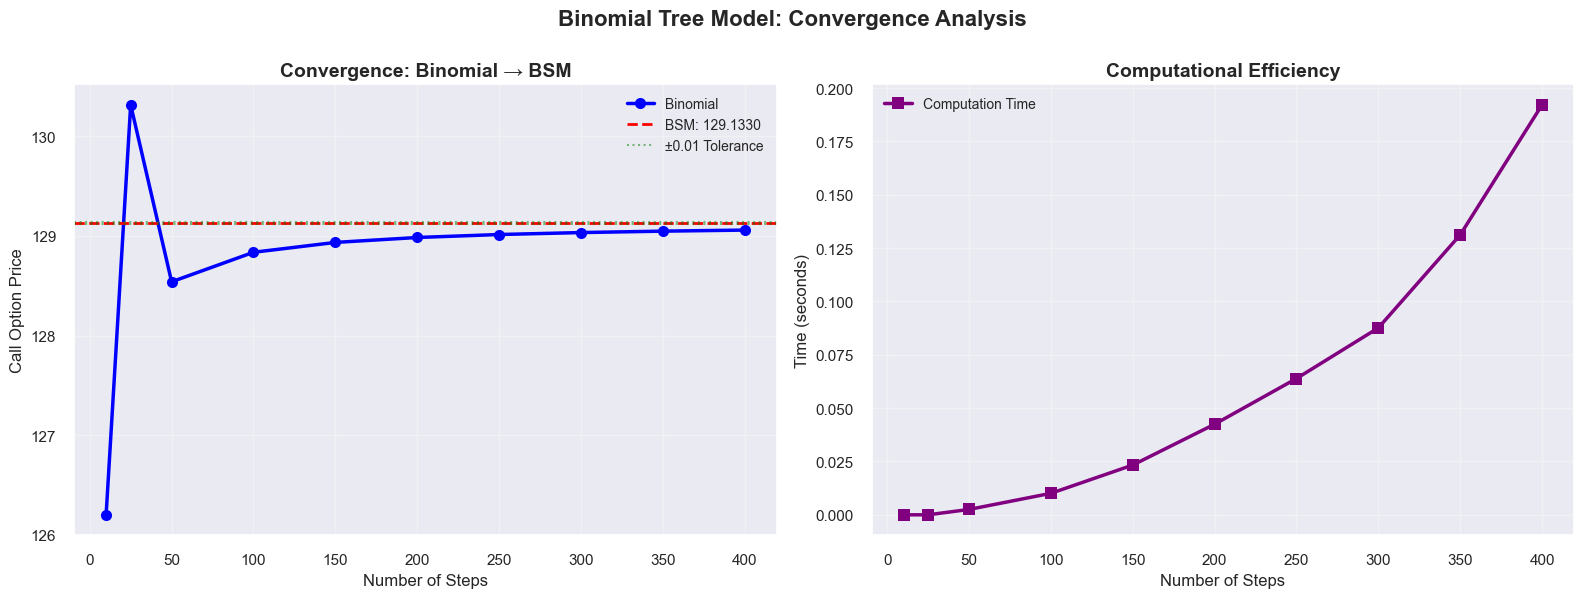


Phase 3 Task C Complete!


In [62]:
# PHASE 3 - TASK C: BINOMIAL OPTION PRICING MODEL

def binomial_price(S, K, T, r, sigma, N, option_type='call'):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    asset_prices = np.zeros(N + 1)
    for j in range(N + 1):
        asset_prices[j] = S * (u ** (N - j)) * (d ** j)
    
    if option_type == 'call':
        option_values = np.maximum(asset_prices - K, 0)
    else:
        option_values = np.maximum(K - asset_prices, 0)
    
    for i in range(N - 1, -1, -1):
        for j in range(i + 1):
            option_values[j] = (p * option_values[j] + (1 - p) * option_values[j + 1]) * np.exp(-r * dt)
    
    return option_values[0]

print(f"{'=' * 70}")
print(f"BINOMIAL OPTION PRICING MODEL")
print(f"{'=' * 70}")

# VOLATILITY SAFETY CHECK
# Convert vol to scalar if it's a Series or has .values attribute
try:
    if hasattr(vol, 'iloc'):
        vol = float(vol.iloc[0])
    elif hasattr(vol, 'values'):
        vol = float(vol.values[0])
    elif hasattr(vol, '__len__') and not isinstance(vol, str):
        vol = float(vol[0])
    else:
        vol = float(vol)
except:
    vol = float(vol)

if vol > 1.0 or vol < 0.05:
    print(f"\n⚠️  Volatility verification failed: vol={vol:.6f}")
    print(f"   Recalculating from daily returns...")
    daily_vol = float(data['Close'].pct_change().dropna().std())
    vol = float(daily_vol * np.sqrt(252))
    print(f"   ✓ Corrected vol = {vol:.6f} ({vol*100:.2f}%)")

S = float(data['Close'].iloc[-1])
K = S
T = 1/12
r = 0.06
sigma = float(vol)  # Use volatility from Phase 1
N = 250

print(f"\nAnalysis Parameters:")
print(f"  [Volatility check: vol={vol:.6f}, sigma={sigma:.6f}]")
print(f"  - Stock Price: {S:.2f}")
print(f"  - Strike: {K:.2f} [ATM]")
print(f"  - Time to Maturity: {T:.4f} years")
print(f"  - Risk-Free Rate: {r:.2%}")
print(f"  - Volatility: {sigma:.2%}")
print(f"  - Binomial Steps: {N}")

binom_c = binomial_price(S, K, T, r, sigma, N, 'call')
binom_p = binomial_price(S, K, T, r, sigma, N, 'put')

bsm_c = bsm_price(S, K, T, r, sigma, 'call')
bsm_p = bsm_price(S, K, T, r, sigma, 'put')

err_c = abs(binom_c - bsm_c)
err_p = abs(binom_p - bsm_p)
err_pct = (err_c / bsm_c) * 100

print(f"\nComparative Pricing Results:")
print(f"  Call Option:")
print(f"    - Binomial: {binom_c:.4f}")
print(f"    - BSM: {bsm_c:.4f}")
print(f"    - Error: {err_c:.4f} ({err_pct:.2f}%)")
print(f"  Put Option:")
print(f"    - Binomial: {binom_p:.4f}")
print(f"    - BSM: {bsm_p:.4f}")
print(f"    - Error: {err_p:.4f}")

acc = 0.01
steps = [10, 25, 50, 100, 150, 200, 250, 300, 350, 400]

prices_b = [binomial_price(S, K, T, r, sigma, n, 'call') for n in steps]

times = []

for n in steps:
    t_start = time.time()
    binomial_price(S, K, T, r, sigma, n, 'call')
    times.append(time.time() - t_start)

err_final = abs(prices_b[-1] - bsm_c)
improve = ((abs(prices_b[0] - bsm_c) - err_final) / abs(prices_b[0] - bsm_c)) * 100

print(f"\nConvergence Analysis:")
print(f"  - Initial Error [N=10]: {abs(prices_b[0] - bsm_c):.4f}")
print(f"  - Final Error [N=400]: {err_final:.4f}")
print(f"  - Improvement: {improve:.2f}%")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.plot(steps, prices_b, marker='o', color='blue', linewidth=2.5, markersize=8, label='Binomial')
ax1.axhline(y=bsm_c, color='red', linestyle='--', linewidth=2, label=f'BSM: {bsm_c:.4f}')
ax1.axhline(y=bsm_c + acc, color='green', linestyle=':', alpha=0.5, linewidth=1.5, 
            label=f'±{acc} Tolerance')
ax1.axhline(y=bsm_c - acc, color='green', linestyle=':', alpha=0.5, linewidth=1.5)
ax1.set_title('Convergence: Binomial → BSM', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Steps', fontsize=12)
ax1.set_ylabel('Call Option Price', fontsize=12)
ax1.legend(loc='best', fontsize=10)
ax1.grid(True, alpha=0.3)

ax2.plot(steps, times, marker='s', color='purple', linewidth=2.5, markersize=8, 
         label='Computation Time')
ax2.set_title('Computational Efficiency', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Steps', fontsize=12)
ax2.set_ylabel('Time (seconds)', fontsize=12)
ax2.legend(loc='best', fontsize=10)
ax2.grid(True, alpha=0.3)

plt.suptitle('Binomial Tree Model: Convergence Analysis',
             fontsize=16, fontweight='bold', y=0.995)
plt.savefig(os.path.join(output_dir, '4_Binomial_Convergence_Analysis.png'), dpi=300, bbox_inches='tight')
plt.tight_layout()

plt.show()
print(f"\nPhase 3 Task C Complete!")


---

## Phase 4: Data Export - CSV & Excel Generation

### Objective
Compile all analysis results into structured data files for documentation and presentation purposes.

### Exported Data:
1. **Stock Data:** Historical prices and returns
2. **Volatility Analysis:** Daily and annualized volatility metrics
3. **Synthetic Portfolio:** 3-month tracking results with Put-Call Parity validation
4. **BSM Greeks:** Delta and Vega analysis across price/volatility ranges
5. **Binomial Convergence:** Step-wise pricing and computational efficiency

### Output Files:
- `DRM_Results.csv` - Combined results in CSV format
- `DRM_Results.xlsx` - Multi-sheet Excel workbook

In [63]:
# PHASE 4: CONSOLIDATED EXCEL EXPORT

import os
from datetime import datetime

print(f"{'=' * 70}")
print(f"CONSOLIDATED EXCEL EXPORT")
print(f"{'=' * 70}")

# 1. Summary Statistics
df_summary = pd.DataFrame({
    'Metric': [
        'Ticker Symbol', 'Analysis Date', 'Data Start Date', 'Data End Date',
        'Total Trading Days', 'Starting Price (INR)', 'Ending Price (INR)',
        'Max Price (INR)', 'Min Price (INR)', 'Mean Price (INR)',
        'Total Return (%)', 'Annualized Return (%)', 'Daily Volatility',
        'Annualized Volatility (%)', 'Volatility Classification', 'Risk-Free Rate (%)',
        'Mean Daily Return', 'Skewness', 'Kurtosis'
    ],
    'Value': [
        ticker, datetime.now().strftime('%Y-%m-%d'),
        data.index[0].strftime('%Y-%m-%d'), data.index[-1].strftime('%Y-%m-%d'),
        len(data), f"{p_start:.2f}", f"{p_end:.2f}", f"{p_max:.2f}",
        f"{p_min:.2f}", f"{p_mean:.2f}", f"{ret_total*100:.2f}",
        f"{ret_annual*100:.2f}", f"{daily_vol:.6f}", f"{vol*100:.2f}",  # vol should be ~0.25-0.30 range
        'LOW' if vol < 0.15 else 'MODERATE' if vol < 0.25 else 'HIGH' if vol < 0.35 else 'VERY HIGH',
        "6.00", f"{data['Log_Returns'].mean():.6f}",
        f"{data['Log_Returns'].skew():.4f}", f"{data['Log_Returns'].kurtosis():.4f}"
    ]
})

# 2. Stock Price Data
df_stock = data[['Close', 'Log_Returns']].copy()
df_stock['Date'] = df_stock.index.strftime('%Y-%m-%d')
df_stock = df_stock.reset_index(drop=True)[['Date', 'Close', 'Log_Returns']]
df_stock.columns = ['Date', 'Close_Price', 'Log_Returns']

# 3. Synthetic Portfolio Tracking
df_synthetic = df_res.reset_index()
df_synthetic['Date'] = df_synthetic['Date'].dt.strftime('%Y-%m-%d')

# 4. Task A Comparison
# Define missing variables for Task A Comparison
cost_call = call_init
payoff_call = max(stock_prices[-1] - K, 0)
pnl_call = payoff_call - cost_call
roc_call = (pnl_call / cost_call) * 100 if cost_call != 0 else 0

cost_synth = initial_synth_cost
payoff_synth = final_synth_value
roc_synth = (pnl_synth / cost_synth) * 100 if cost_synth != 0 else 0

df_task_a = pd.DataFrame({
    'Metric': ['Initial Cost', 'Final Payoff', 'Profit/Loss', 'Return on Capital (%)'],
    'Actual_Call': [cost_call, payoff_call, pnl_call, roc_call],
    'Synthetic_Call': [cost_synth, payoff_synth, pnl_synth, roc_synth]
})

# 5. Option Pricing Summary
df_pricing = pd.DataFrame({
    'Model': ['BSM', 'BSM', 'Binomial (N=250)', 'Binomial (N=250)'],
    'Option_Type': ['Call', 'Put', 'Call', 'Put'],
    'Price': [bsm_c, bsm_p, binom_c, binom_p],
    'Stock_Price': [S] * 4,
    'Strike_Price': [K] * 4,
    'Time_To_Maturity': [T] * 4,
    'Volatility_Pct': [sigma * 100] * 4,
    'Risk_Free_Rate_Pct': [6.00] * 4
})

# 6. Delta Analysis
df_delta = pd.DataFrame({
    'Stock_Price': S_range,
    'Call_Delta': deltas_c,
    'Put_Delta': deltas_p,
    'Call_Price': calls,
    'Put_Price': puts
})

# 7. Vega Analysis
df_vega = pd.DataFrame({
    'Volatility_Pct': vol_range * 100,
    'Vega': vegas,
    'Call_Price': calls_vol
})

# 8. Binomial Convergence
df_binomial = pd.DataFrame({
    'Steps': steps,
    'Binomial_Price': prices_b,
    'BSM_Price': [bsm_c] * len(steps),
    'Error': [abs(p - bsm_c) for p in prices_b],
    'Computation_Time_Sec': times
})

# Create output directory
output_dir = os.path.join(os.getcwd(), 'DRM_Output')
os.makedirs(output_dir, exist_ok=True)

print(f"\nOutput Directory: {output_dir}")
print(f"{'=' * 70}")

# Export individual CSV files
print(f"\n[STEP 1] Exporting Individual CSV Files...")
csv_files = {
    '1_Summary': df_summary,
    '2_Stock_Data': df_stock,
    '3_Synthetic_Portfolio': df_synthetic,
    '4_TaskA_Comparison': df_task_a,
    '5_Option_Pricing': df_pricing,
    '6_Delta_Analysis': df_delta,
    '7_Vega_Analysis': df_vega,
    '8_Binomial_Convergence': df_binomial
}

for name, df in csv_files.items():
    csv_path = os.path.join(output_dir, f'{name}.csv')
    df.to_csv(csv_path, index=False)
    print(f"  ✓ Saved: {name}.csv ({len(df)} rows)")

# Export individual Excel files
print(f"\n[STEP 2] Exporting Individual Excel Files...")
for name, df in csv_files.items():
    excel_path = os.path.join(output_dir, f'{name}.xlsx')
    df.to_excel(excel_path, index=False, engine='openpyxl')
    print(f"  ✓ Saved: {name}.xlsx ({len(df)} rows)")

# Export consolidated Excel file
print(f"\n[STEP 3] Exporting Consolidated Excel File...")
consolidated_excel = os.path.join(output_dir, 'DRM_Results_Consolidated.xlsx')

with pd.ExcelWriter(consolidated_excel, engine='openpyxl') as writer:
    df_summary.to_excel(writer, sheet_name='Summary', index=False)
    df_stock.to_excel(writer, sheet_name='Stock_Data', index=False)
    df_synthetic.to_excel(writer, sheet_name='Synthetic_Portfolio', index=False)
    df_task_a.to_excel(writer, sheet_name='TaskA_Comparison', index=False)
    df_pricing.to_excel(writer, sheet_name='Option_Pricing', index=False)
    df_delta.to_excel(writer, sheet_name='Delta_Analysis', index=False)
    df_vega.to_excel(writer, sheet_name='Vega_Analysis', index=False)
    df_binomial.to_excel(writer, sheet_name='Binomial_Convergence', index=False)

print(f"  ✓ Saved: DRM_Results_Consolidated.xlsx (8 sheets)")

# Display all DataFrames
print(f"\n{'=' * 70}")
print(f"DISPLAYING ALL DATAFRAMES")
print(f"{'=' * 70}")

print(f"\n[1] SUMMARY STATISTICS")
print(f"{'-' * 70}")
print(df_summary.to_string(index=False))

print(f"\n\n[2] STOCK DATA (First 10 & Last 10 rows)")
print(f"{'-' * 70}")
print(df_stock.head(10).to_string(index=False))
print("...")
print(df_stock.tail(10).to_string(index=False))

print(f"\n\n[3] SYNTHETIC PORTFOLIO (First 10 & Last 10 rows)")
print(f"{'-' * 70}")
print(df_synthetic.head(10).to_string(index=False))
print("...")
print(df_synthetic.tail(10).to_string(index=False))

print(f"\n\n[4] TASK A COMPARISON")
print(f"{'-' * 70}")
print(df_task_a.to_string(index=False))

print(f"\n\n[5] OPTION PRICING SUMMARY")
print(f"{'-' * 70}")
print(df_pricing.to_string(index=False))

print(f"\n\n[6] DELTA ANALYSIS (First 10 & Last 10 rows)")
print(f"{'-' * 70}")
print(df_delta.head(10).to_string(index=False))
print("...")
print(df_delta.tail(10).to_string(index=False))

print(f"\n\n[7] VEGA ANALYSIS (First 10 & Last 10 rows)")
print(f"{'-' * 70}")
print(df_vega.head(10).to_string(index=False))
print("...")
print(df_vega.tail(10).to_string(index=False))

print(f"\n\n[8] BINOMIAL CONVERGENCE")
print(f"{'-' * 70}")
print(df_binomial.to_string(index=False))

print(f"\n{'=' * 70}")
print(f"EXPORT COMPLETE!")
print(f"{'=' * 70}")
print(f"\nFile Summary:")
print(f"  - Individual CSV files: 8 files")
print(f"  - Individual Excel files: 8 files")
print(f"  - Consolidated Excel: 1 file (8 sheets)")
print(f"  - Total files created: 17 files")
print(f"\nAll files saved to: {output_dir}")
print(f"\nPhase 4 Complete!")

CONSOLIDATED EXCEL EXPORT

Output Directory: c:\Users\amrit\Desktop\FINAL_DRM\DRM-GA\DRM_Output

[STEP 1] Exporting Individual CSV Files...
  ✓ Saved: 1_Summary.csv (19 rows)
  ✓ Saved: 2_Stock_Data.csv (496 rows)
  ✓ Saved: 3_Synthetic_Portfolio.csv (63 rows)
  ✓ Saved: 4_TaskA_Comparison.csv (4 rows)
  ✓ Saved: 5_Option_Pricing.csv (4 rows)
  ✓ Saved: 6_Delta_Analysis.csv (100 rows)
  ✓ Saved: 7_Vega_Analysis.csv (100 rows)
  ✓ Saved: 8_Binomial_Convergence.csv (10 rows)

[STEP 2] Exporting Individual Excel Files...
  ✓ Saved: 1_Summary.xlsx (19 rows)
  ✓ Saved: 2_Stock_Data.xlsx (496 rows)
  ✓ Saved: 3_Synthetic_Portfolio.xlsx (63 rows)
  ✓ Saved: 4_TaskA_Comparison.xlsx (4 rows)
  ✓ Saved: 4_TaskA_Comparison.xlsx (4 rows)
  ✓ Saved: 5_Option_Pricing.xlsx (4 rows)
  ✓ Saved: 6_Delta_Analysis.xlsx (100 rows)
  ✓ Saved: 7_Vega_Analysis.xlsx (100 rows)
  ✓ Saved: 8_Binomial_Convergence.xlsx (10 rows)

[STEP 3] Exporting Consolidated Excel File...
  ✓ Saved: 5_Option_Pricing.xlsx (4 row


PHASE 3: OPTION GREEKS ANALYSIS
ATM Call Greeks (S=3598.40, K=4069.60, T=0.25y, r=6.00%, sigma=25.40%):
  - Delta: 0.2155
  - Gamma: 0.0006
  - Theta: -0.8514
  - Vega: 5.2644
  - Rho: 1.8066


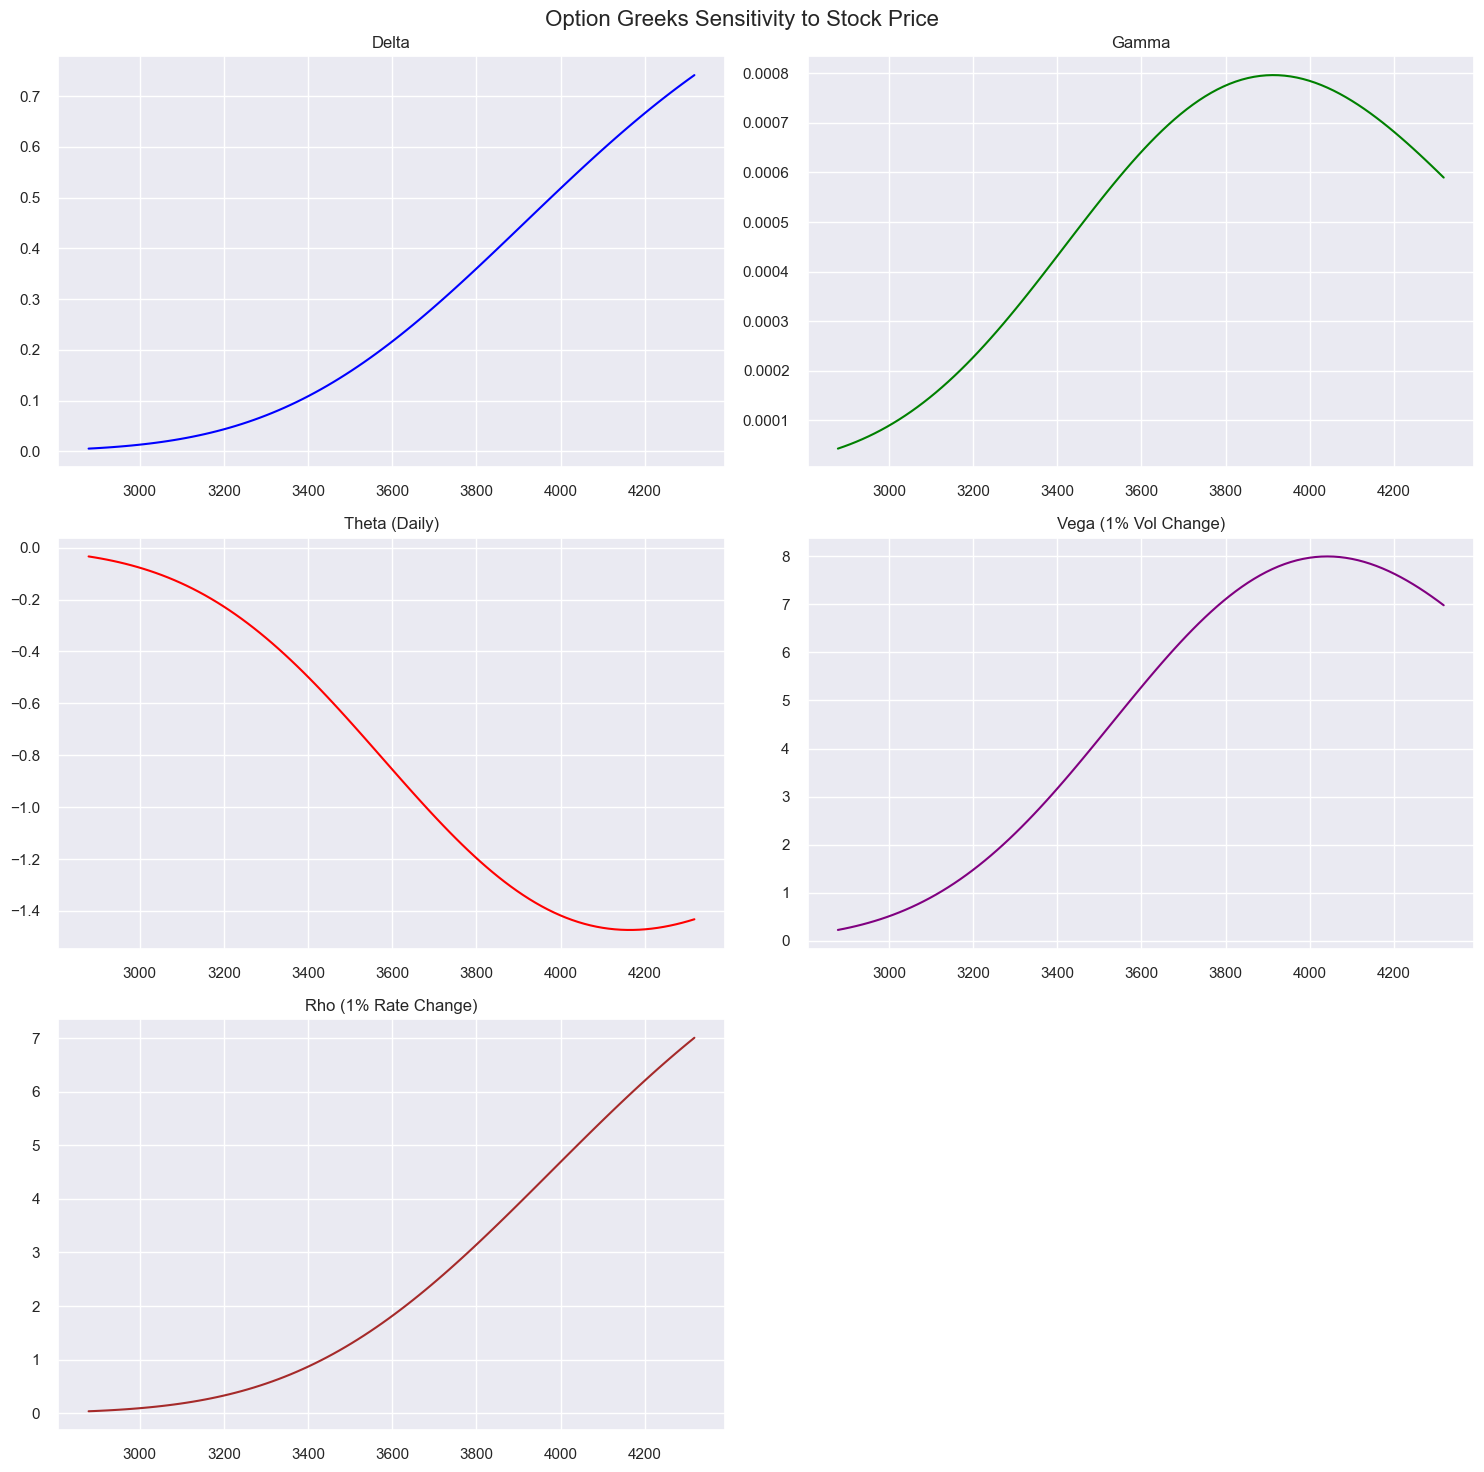

  - Volatility: 25.40%


In [64]:
# PHASE 3: OPTION GREEKS ANALYSIS

print(f"\n{'=' * 60}")
print(f"PHASE 3: OPTION GREEKS ANALYSIS")
print(f"{'=' * 60}")

# VOLATILITY SAFETY CHECK
# Convert sigma to scalar if it's a Series or has .values attribute
try:
    if hasattr(sigma, 'iloc'):
        sigma = float(sigma.iloc[0])
    elif hasattr(sigma, 'values'):
        sigma = float(sigma.values[0])
    elif hasattr(sigma, '__len__') and not isinstance(sigma, str):
        sigma = float(sigma[0])
    else:
        sigma = float(sigma)
except:
    sigma = float(sigma)

if sigma > 1.0 or sigma < 0.05:
    print(f"\n⚠️  Volatility verification failed: sigma={sigma:.6f}")
    print(f"   Recalculating from daily returns...")
    daily_vol = float(data['Close'].pct_change().dropna().std())
    sigma = float(daily_vol * np.sqrt(252))
    print(f"   ✓ Corrected sigma = {sigma:.6f} ({sigma*100:.2f}%)")

sigma = float(sigma)  # Ensure sigma is float

# 1. Calculate Greeks for ATM Option
greeks_atm = bsm_greeks(S0, K, T_init, r, sigma, 'call')
print(f"ATM Call Greeks (S={S0:.2f}, K={K:.2f}, T={T_init}y, r={r:.2%}, sigma={sigma:.2%}):")
for g, v in greeks_atm.items():
    print(f"  - {g.capitalize()}: {v:.4f}")

# 2. Plot Greeks vs Stock Price
S_range = np.linspace(S0 * 0.8, S0 * 1.2, 100)
greeks_S = {'delta': [], 'gamma': [], 'theta': [], 'vega': [], 'rho': []}

for s in S_range:
    g = bsm_greeks(s, K, T_init, r, sigma, 'call')
    for k in greeks_S:
        greeks_S[k].append(g[k])

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Option Greeks Sensitivity to Stock Price', fontsize=16)

axes[0, 0].plot(S_range, greeks_S['delta'], color='blue')
axes[0, 0].set_title('Delta')
axes[0, 0].grid(True)

axes[0, 1].plot(S_range, greeks_S['gamma'], color='green')
axes[0, 1].set_title('Gamma')
axes[0, 1].grid(True)

axes[1, 0].plot(S_range, greeks_S['theta'], color='red')
axes[1, 0].set_title('Theta (Daily)')
axes[1, 0].grid(True)

axes[1, 1].plot(S_range, greeks_S['vega'], color='purple')
axes[1, 1].set_title('Vega (1% Vol Change)')
axes[1, 1].grid(True)

axes[2, 0].plot(S_range, greeks_S['rho'], color='brown')
axes[2, 0].set_title('Rho (1% Rate Change)')
axes[2, 0].grid(True)

# Hide empty subplot
axes[2, 1].axis('off')

plt.savefig(os.path.join('DRM_Output', '6_Greeks_Sensitivity_Analysis.png'), dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()


print(f"  - Volatility: {sigma:.2%}")